# <span style="color:red; font-size:75px;"> Code</span>

<span style="color:red; font-size: 50px;">Tên đề tài: Phân tích tình hình dịch bệnh Covid-19</span>

## Nhóm 13
## Thành viên 

1. Nguyễn Minh Sơn - 20110713
2. Lê Anh Nhân - 20110689
3. Đỗ Minh Dũng - 20110620
4. Nguyễn Thái Ngọc Tân - 20110719

## Tiền xử lý dữ liệu

#### Import library

In [82]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=False)
import plotly.io as pio
import plotly.graph_objects as go

pio.renderers.default = 'notebook+jupyterlab'

pio.templates['slides'] = go.layout.Template(layout=dict(width=800, height=550))
pio.templates.default = 'plotly+slides'
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
import pylab
import math

#### Đọc và làm sạch dữ liệu

In [83]:
covid_df = pd.read_csv('../data/owid-covid-data.csv')

##### Lấy các biến cần thiết

In [84]:
covid_df = covid_df[['continent', 'location', 'date', 'total_cases',  'new_cases', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths', 'new_deaths', 'total_deaths_per_million', 'new_deaths_per_million', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', 'population']]

##### Thay đổi tên các biến

In [85]:
covid_df.columns = ['Continent', 'Location', 'Date', 'TotalCases',  'NewCases', 'TotalCases_per_million', 'NewCases_per_million', 'TotalDeaths', 'NewDeaths', 'TotalDeaths_per_million', 'NewDeaths_per_million', 'TotalVaccinations', 'PeopleVaccinated', 'PeopleFullyVaccinated', 'PeopleFullyVaccinated_per_hundred', 'Population']

##### Kiểm tra dữ liệu

In [86]:
print("Ta thấy vẫn còn nhiều ô nhận giá trị NULL, ta sẽ chuẩn hoá giá trị trong các cột này")
covid_df.isnull().sum()

Ta thấy vẫn còn nhiều ô nhận giá trị NULL, ta sẽ chuẩn hoá giá trị trong các cột này


Continent                              9956
Location                                  0
Date                                      0
TotalCases                             3033
NewCases                               3193
TotalCases_per_million                 3791
NewCases_per_million                   3951
TotalDeaths                           20875
NewDeaths                             20839
TotalDeaths_per_million               21620
NewDeaths_per_million                 21584
TotalVaccinations                    121132
PeopleVaccinated                     123339
PeopleFullyVaccinated                126085
PeopleFullyVaccinated_per_hundred    126085
Population                             1075
dtype: int64

##### Các khu vực không có tên châu lục

In [87]:
t = covid_df[covid_df['Continent'].isna()]
print("Các khu vực không có tên châu lục: \n")
print(t.Location.unique())
print("\nCác giá trị trong cột 'Location' của tập dữ liệu là tên các khu vực trên thế giới, bao gồm cả tên các quốc gia. Vì một số khu vực trong cột `Location` cũng chính là tên châu lục nên giá trị tương ứng trong cột `Continent` đã nhận giá trị NaN. Do vậy, nhóm sẽ chuẩn hoá các giá trị NaN này thành 0")

Các khu vực không có tên châu lục: 

['Africa' 'Asia' 'Europe' 'European Union' 'High income' 'International'
 'Low income' 'Lower middle income' 'North America' 'Oceania'
 'South America' 'Upper middle income' 'World']

Các giá trị trong cột 'Location' của tập dữ liệu là tên các khu vực trên thế giới, bao gồm cả tên các quốc gia. Vì một số khu vực trong cột `Location` cũng chính là tên châu lục nên giá trị tương ứng trong cột `Continent` đã nhận giá trị NaN. Do vậy, nhóm sẽ chuẩn hoá các giá trị NaN này thành 0


##### Các khu vực không có thông kê dân số

In [88]:
t = covid_df[covid_df['Population'].isna()]
print(f"\nMột số khu vực trên thế giới như {t.Location.unique()} chưa có thống kê về dân số trong tập dữ liệu, nên nhóm sẽ bỏ qua các dòng dữ liệu của các khu vực này.")
covid_df = covid_df[~covid_df['Population'].isna()]


Một số khu vực trên thế giới như ['International' 'Northern Cyprus'] chưa có thống kê về dân số trong tập dữ liệu, nên nhóm sẽ bỏ qua các dòng dữ liệu của các khu vực này.


##### Clean Data

In [89]:
print("Còn lại những cột có dữ liệu bị để trống (NULL) vì vào thời điểm quan sát thì có thể chưa xảy ra ca tử vong, chưa có ca mắc hoặc chưa có vaccine để tiêm phòng... ")
print("Vì thế, nhóm sẽ làm sạch dữ liệu của các cột nhận giá trị NaN khác bằng các số 0")
covid_df = covid_df.replace('', np.nan).fillna(0)

Còn lại những cột có dữ liệu bị để trống (NULL) vì vào thời điểm quan sát thì có thể chưa xảy ra ca tử vong, chưa có ca mắc hoặc chưa có vaccine để tiêm phòng... 
Vì thế, nhóm sẽ làm sạch dữ liệu của các cột nhận giá trị NaN khác bằng các số 0


Dữ liệu sau khi đã làm sạch

In [90]:
covid_df.isnull().sum()

Continent                            0
Location                             0
Date                                 0
TotalCases                           0
NewCases                             0
TotalCases_per_million               0
NewCases_per_million                 0
TotalDeaths                          0
NewDeaths                            0
TotalDeaths_per_million              0
NewDeaths_per_million                0
TotalVaccinations                    0
PeopleVaccinated                     0
PeopleFullyVaccinated                0
PeopleFullyVaccinated_per_hundred    0
Population                           0
dtype: int64

##### Thời gian thu thập dữ liệu về dịch bệnh

In [91]:
covid_world_df = covid_df[covid_df.Location == 'World']
print(f"Dữ liệu về dịch bệnh Covid-19 được thu thập từ ngày {covid_world_df.Date.min()} tới ngày {covid_world_df.Date.max()}")

Dữ liệu về dịch bệnh Covid-19 được thu thập từ ngày 2020-01-22 tới ngày 2022-03-05


## Chi tiết về dữ liệu

### Hình thái dữ liệu

In [92]:
covid_df.shape

(165251, 16)

### 10 quan sát đầu tập dữ liệu

In [93]:
covid_df.head(10)

Continent     Location        Date  TotalCases  NewCases  \
0      Asia  Afghanistan  2020-02-24         5.0       5.0   
1      Asia  Afghanistan  2020-02-25         5.0       0.0   
2      Asia  Afghanistan  2020-02-26         5.0       0.0   
3      Asia  Afghanistan  2020-02-27         5.0       0.0   
4      Asia  Afghanistan  2020-02-28         5.0       0.0   
5      Asia  Afghanistan  2020-02-29         5.0       0.0   
6      Asia  Afghanistan  2020-03-01         5.0       0.0   
7      Asia  Afghanistan  2020-03-02         5.0       0.0   
8      Asia  Afghanistan  2020-03-03         5.0       0.0   
9      Asia  Afghanistan  2020-03-04         5.0       0.0   

   TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
0                   0.126                 0.126          0.0        0.0   
1                   0.126                 0.000          0.0        0.0   
2                   0.126                 0.000          0.0        0.0   
3                   0.126                 0.000          0.0        0.0   
4                   0.126                 0.000          0.0        0.0   
5                   0.126                 0.000          0.0        0.0   
6                   0.126                 0.000          0.0        0.0   
7                   0.126                 0.000          0.0        0.0   
8                   0.126                 0.000          0.0        0.0   
9                   0.126                 0.000          0.0        0.0   

   TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
0                      0.0                    0.0                0.0   
1                      0.0                    0.0                0.0   
2                      0.0                    0.0                0.0   
3                      0.0                    0.0                0.0   
4                      0.0                    0.0                0.0   
5                      0.0                    0.0                0.0   
6                      0.0                    0.0                0.0   
7                      0.0                    0.0                0.0   
8                      0.0                    0.0                0.0   
9                      0.0                    0.0                0.0   

   PeopleVaccinated  PeopleFullyVaccinated  PeopleFullyVaccinated_per_hundred  \
0               0.0                    0.0                                0.0   
1               0.0                    0.0                                0.0   
2               0.0                    0.0                                0.0   
3               0.0                    0.0                                0.0   
4               0.0                    0.0                                0.0   
5               0.0                    0.0                                0.0   
6               0.0                    0.0                                0.0   
7               0.0                    0.0                                0.0   
8               0.0                    0.0                                0.0   
9               0.0                    0.0                                0.0   

   Population  
0  39835428.0  
1  39835428.0  
2  39835428.0  
3  39835428.0  
4  39835428.0  
5  39835428.0  
6  39835428.0  
7  39835428.0  
8  39835428.0  
9  39835428.0

### 10 quan sát cuối tập dữ liệu

In [94]:
covid_df.tail(10)

Continent  Location        Date  TotalCases  NewCases  \
166316    Africa  Zimbabwe  2022-02-24    234967.0     378.0   
166317    Africa  Zimbabwe  2022-02-25    235467.0     500.0   
166318    Africa  Zimbabwe  2022-02-26    235803.0     336.0   
166319    Africa  Zimbabwe  2022-02-27    235803.0       0.0   
166320    Africa  Zimbabwe  2022-02-28    236380.0     577.0   
166321    Africa  Zimbabwe  2022-03-01    236871.0     491.0   
166322    Africa  Zimbabwe  2022-03-02    237503.0     632.0   
166323    Africa  Zimbabwe  2022-03-03    237503.0       0.0   
166324    Africa  Zimbabwe  2022-03-04    238739.0    1236.0   
166325    Africa  Zimbabwe  2022-03-05    239019.0     280.0   

        TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
166316               15568.801                25.046       5390.0        2.0   
166317               15601.930                33.130       5392.0        2.0   
166318               15624.193                22.263       5393.0        1.0   
166319               15624.193                 0.000       5393.0        0.0   
166320               15662.425                38.232       5395.0        2.0   
166321               15694.959                32.533       5395.0        0.0   
166322               15736.835                41.876       5396.0        1.0   
166323               15736.835                 0.000       5396.0        0.0   
166324               15818.731                81.897       5397.0        1.0   
166325               15837.284                18.553       5397.0        0.0   

        TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
166316                  357.139                  0.133          7858794.0   
166317                  357.271                  0.133          7870399.0   
166318                  357.338                  0.066          7876942.0   
166319                  357.338                  0.000          7882244.0   
166320                  357.470                  0.133          7890951.0   
166321                  357.470                  0.000          7901360.0   
166322                  357.536                  0.066          7910740.0   
166323                  357.536                  0.000          7921113.0   
166324                  357.603                  0.066          7930621.0   
166325                  357.603                  0.000                0.0   

        PeopleVaccinated  PeopleFullyVaccinated  \
166316         4351621.0              3384590.0   
166317         4355217.0              3388940.0   
166318         4357938.0              3390880.0   
166319         4359872.0              3392578.0   
166320         4362150.0              3396655.0   
166321         4365856.0              3399915.0   
166322         4368726.0              3402434.0   
166323         4372925.0              3406482.0   
166324         4374896.0              3408609.0   
166325               0.0                    0.0   

        PeopleFullyVaccinated_per_hundred  Population  
166316                              22.43  15092171.0  
166317                              22.45  15092171.0  
166318                              22.47  15092171.0  
166319                              22.48  15092171.0  
166320                              22.51  15092171.0  
166321                              22.53  15092171.0  
166322                              22.54  15092171.0  
166323                              22.57  15092171.0  
166324                              22.59  15092171.0  
166325                               0.00  15092171.0

# Trực quan hoá dữ liệu

Thông tin các cột trong tập dữ liệu

In [95]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165251 entries, 0 to 166325
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Continent                          165251 non-null  object 
 1   Location                           165251 non-null  object 
 2   Date                               165251 non-null  object 
 3   TotalCases                         165251 non-null  float64
 4   NewCases                           165251 non-null  float64
 5   TotalCases_per_million             165251 non-null  float64
 6   NewCases_per_million               165251 non-null  float64
 7   TotalDeaths                        165251 non-null  float64
 8   NewDeaths                          165251 non-null  float64
 9   TotalDeaths_per_million            165251 non-null  float64
 10  NewDeaths_per_million              165251 non-null  float64
 11  TotalVaccinations                  1652

Một số thống kê cơ bản về dữ liệu

In [96]:
covid_df.describe()

TotalCases      NewCases  TotalCases_per_million  \
count  1.652510e+05  1.652510e+05           165251.000000   
mean   2.505992e+06  1.142253e+04            28963.765115   
std    1.534516e+07  8.389329e+04            51560.618799   
min    0.000000e+00  0.000000e+00                0.000000   
25%    1.739000e+03  0.000000e+00              533.510000   
50%    2.464500e+04  7.400000e+01             4457.275000   
75%    2.891110e+05  1.029000e+03            36582.431500   
max    4.451295e+08  4.206334e+06           706541.904000   

       NewCases_per_million   TotalDeaths      NewDeaths  \
count         165251.000000  1.652510e+05  165251.000000   
mean             163.534992  5.075483e+04     150.669212   
std              677.401746  2.840557e+05     782.870221   
min                0.000000  0.000000e+00       0.000000   
25%                0.000000  2.400000e+01       0.000000   
50%               10.425000  3.850000e+02       1.000000   
75%               97.800500  5.356000e+03      14.000000   
max            51427.491000  5.995245e+06   18020.000000   

       TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
count            165251.000000          165251.000000       1.652510e+05   
mean                446.055149               1.477463       4.703560e+07   
std                 753.155897               4.852677       4.133728e+08   
min                   0.000000               0.000000       0.000000e+00   
25%                   6.466000               0.000000       0.000000e+00   
50%                  72.774000               0.031000       0.000000e+00   
75%                 581.888000               1.032000       5.999550e+04   
max                6322.263000             453.772000       1.085079e+10   

       PeopleVaccinated  PeopleFullyVaccinated  \
count      1.652510e+05           1.652510e+05   
mean       2.292889e+07           1.691146e+07   
std        2.073323e+08           1.652634e+08   
min        0.000000e+00           0.000000e+00   
25%        0.000000e+00           0.000000e+00   
50%        0.000000e+00           0.000000e+00   
75%        1.400250e+04           0.000000e+00   
max        4.976031e+09           4.400787e+09   

       PeopleFullyVaccinated_per_hundred    Population  
count                      165251.000000  1.652510e+05  
mean                            7.905456  1.474332e+08  
std                            19.519701  7.054923e+08  
min                             0.000000  4.700000e+01  
25%                             0.000000  1.172369e+06  
50%                             0.000000  8.478242e+06  
75%                             0.000000  3.393361e+07  
max                           121.450000  7.874966e+09

Một số hàm vẽ biểu đồ cần thiết

In [97]:
def plot_bar(df, x, y, title):
    figure = px.bar(df, x = x, y = y, color = 'Continent', text = x, orientation='h', height=500,
                    color_discrete_sequence = px.colors.qualitative.Dark2)
    figure.update_layout(title=title, xaxis_title=x, yaxis_title=y, height=600, width= 1400, 
                    yaxis_categoryorder = 'total ascending',
                    uniformtext_minsize=8, uniformtext_mode='hide', template='plotly_dark')
    iplot(figure)

In [98]:
def plot_hbar(df, col, number, title):
    figure = px.bar(df.sort_values(col).tail(number), x = col, y = 'Location', color = 'Continent', text = col, orientation='h', height=700,
                   color_discrete_sequence = px.colors.qualitative.Dark2)
    figure.update_layout(title=title, xaxis_title=col, yaxis_title="Country", height=600, width= 1400, 
                    yaxis_categoryorder = 'total ascending',
                    uniformtext_minsize=8, uniformtext_mode='hide', template='plotly_dark')
    iplot(figure)

In [99]:
def plot_sub_lines(df, x, y1, y2, title):
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Số ca mắc mới mỗi ngày", "Số ca tử vong mới mỗi ngày"))
    fig.add_trace(
        go.Scatter(x=df[x], y = df[y1], mode="lines", name=y1),
        row = 1, 
        col = 1,
    )
    fig.add_trace(
        go.Scatter(x=df[x], y = df[y2], mode="lines", name=y2),
        row = 2, 
        col = 1
    )
    fig.update_layout(height=600, width=1400, title_text=title, template='plotly_dark')
    iplot(fig)

In [100]:
def plot_sub_pies(df, y1, y2, title):
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Tổng dân số ở các khu vực", "Tổng số ca mắc ở các khu vực"), specs=[[{"type": "pie"}, {"type": "pie"}]])
    fig.add_trace(
        go.Pie(values=df[y1], labels=df["Continent"]),
        row = 1, 
        col = 1,
    )
    fig.add_trace(
        go.Pie(values=df[y2], labels=df["Continent"]),
        row = 1, 
        col = 2
    )
    fig.update_layout(height=600, width=1000, title_text=title, template='plotly_dark')
    iplot(fig)

In [101]:
def plot_map(df, col, title, size, range):
    fig = px.scatter_geo(df, locations='Location', locationmode="country names", 
                        color=col, size=size,
                        range_color= range,
                        hover_name='Location',
                        projection="natural earth",
                        title=title, color_continuous_scale="portland")
    fig.update_layout(height=600, width= 1400, 
        template='plotly_dark',
        )
    fig.show()

In [102]:
def plot_pie(df, values, names, title):
    fig = px.pie(df, values=values, names=names, title=title)
    fig.update_layout(height=600, width= 1400, 
        template='plotly_dark',
        )
    iplot(fig)

In [103]:
def plot_scatter(df, _x, _y, title, hover_name):
    fig = px.scatter(df, x=_x, y=_y, color = _y, hover_name= hover_name, title=title, trendline="ols", color_continuous_scale=px.colors.sequential.Turbo)
    fig.update_layout(height=600, width = 1200,
            title= {
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'}
        )
    iplot(fig)

In [104]:
def plot_ticks_vaccine(title):
    bars = []
    bars.append(go.Bar(
        x = covid_world_before_vaccine["Date"],
        y = covid_world_before_vaccine["Mortality"],
        marker={'color': 'yellow'},
        name = 'Before'
    ))
    bars.append(go.Bar(
        x = covid_world_after_vaccine["Date"],
        y = covid_world_after_vaccine["Mortality"],
        marker={'color': 'aqua'},
        name = 'After'
    ))

    fig = go.FigureWidget(data=bars)
    fig.update_layout(height=600, width= 1400, 
        template='plotly_dark',
        title = title
        )
    iplot(fig)

In [105]:
def plot_ticks_variant(df, var, col, title, is_group):
    if is_group:
        df= df.groupby(by=var).agg({var : 'first',col : 'sum'})
    df_omicron = df[df[var] >= date_omicron]
    df_delta = df[df[var] < date_omicron]
    df_delta = df_delta[df_delta[var] >= date_delta]
    bars = []
    bars.append(go.Bar(
        x = df_delta[var],
        y = df_delta[col],
        marker={'color': 'red'},
        name = 'Delta'
    ))
    bars.append(go.Bar(
        x = df_omicron[var],
        y = df_omicron[col],
        marker={'color': 'greenyellow'},
        name = 'Omicron'
    ))

    fig = go.FigureWidget(data=bars)
    fig.update_layout(height=600, width= 1400,
        template='plotly_dark',
        title = title
        )
    iplot(fig)

Một số hàm tính các giá trị cho thống kê T-test

In [106]:
def get_value(data):
    mean = statistics.mean(data)
    size = len(data)
    df =  size - 1
    one_tailed_prob = (1 - 0.95) / 2
    sd = statistics.stdev(data)
    t_value = stats.t.ppf(1 - one_tailed_prob, df)
    se = sd / math.sqrt(size)
    return mean, t_value, se, size
def get_df_value(n1, n2, s1, s2):
    return (((s1**2 / n1) + (s2**2 / n2))**2) / (((s1**2 / n1)**2 / (n1 - 1)) + ((s2**2 / n2)**2 / (n2 - 1)))
def get_confident_interval(data1, data2):
    mean1, t1, s1, n1 = get_value(data1)
    mean2, t2, s2, n2 = get_value(data2)
    df = get_df_value(n1, n2, s1, s2)
    t = stats.t.ppf(1 - 0.05/2, df)
    s = math.sqrt((s1**2 / n1) + (s2**2 / n2))
    return (mean1 - mean2 - t*s, mean1 - mean2 + t*s)

In [107]:
covid_group_loction = covid_df.copy()
covid_group_loction = covid_group_loction[covid_group_loction.Continent != 0]
covid_group_loction = covid_group_loction.groupby(['Location'])['TotalCases', 'TotalDeaths'].max()
covid_group_loction = covid_group_loction.reset_index()
covid_group_loction['SizeCases'] = covid_group_loction['TotalCases'].pow(0.3)
covid_group_loction['SizeDeaths'] = covid_group_loction['TotalCases'].pow(0.3)

C:\Users\nguye\AppData\Local\Temp\ipykernel_20392\2878369555.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



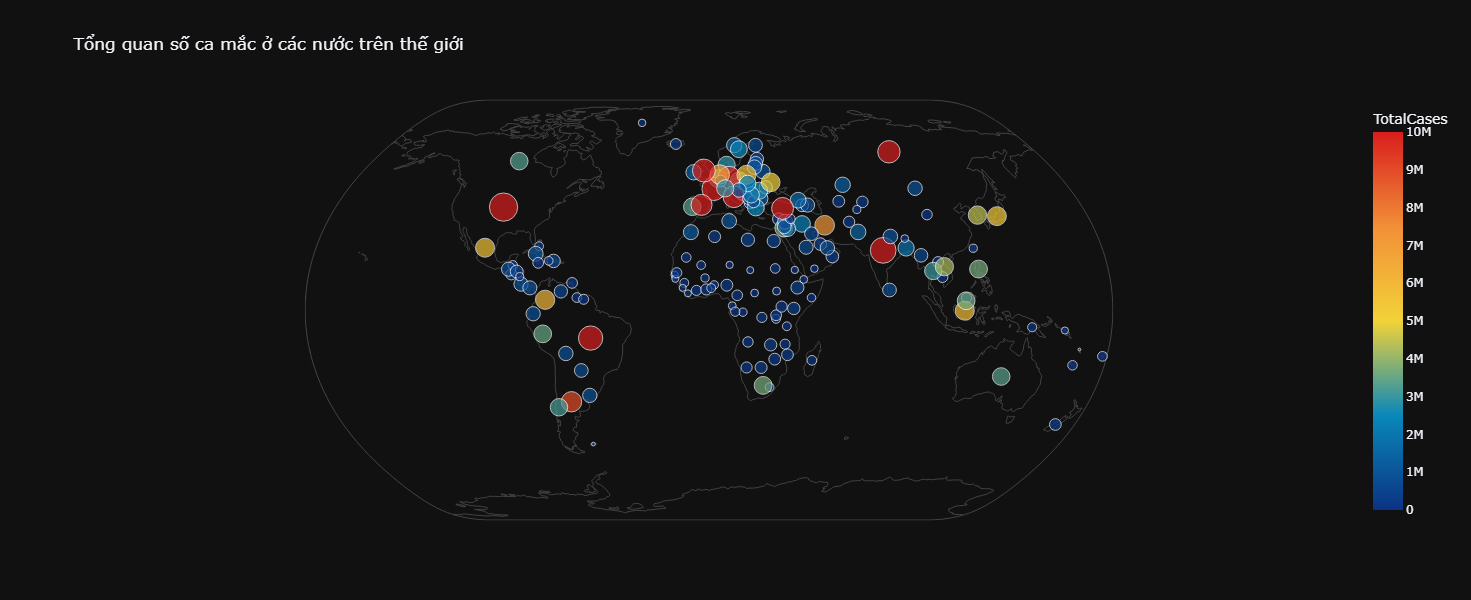

In [108]:
init_notebook_mode(connected=True)
plot_map(covid_group_loction, "TotalCases", "Tổng quan số ca mắc ở các nước trên thế giới", 'SizeCases', [0, 10**7])

Ta thấy số ca mắc Covid-19 đã bao phủ khắp các nước trên thế giới, một số quốc gia như Mỹ, Nga, Anh, Ấn Độ ...- những nước có nền kinh tế phát triển đều có số ca mắc lên tới hàng chục triệu tính đến thời điểm xét tập dữ liệu

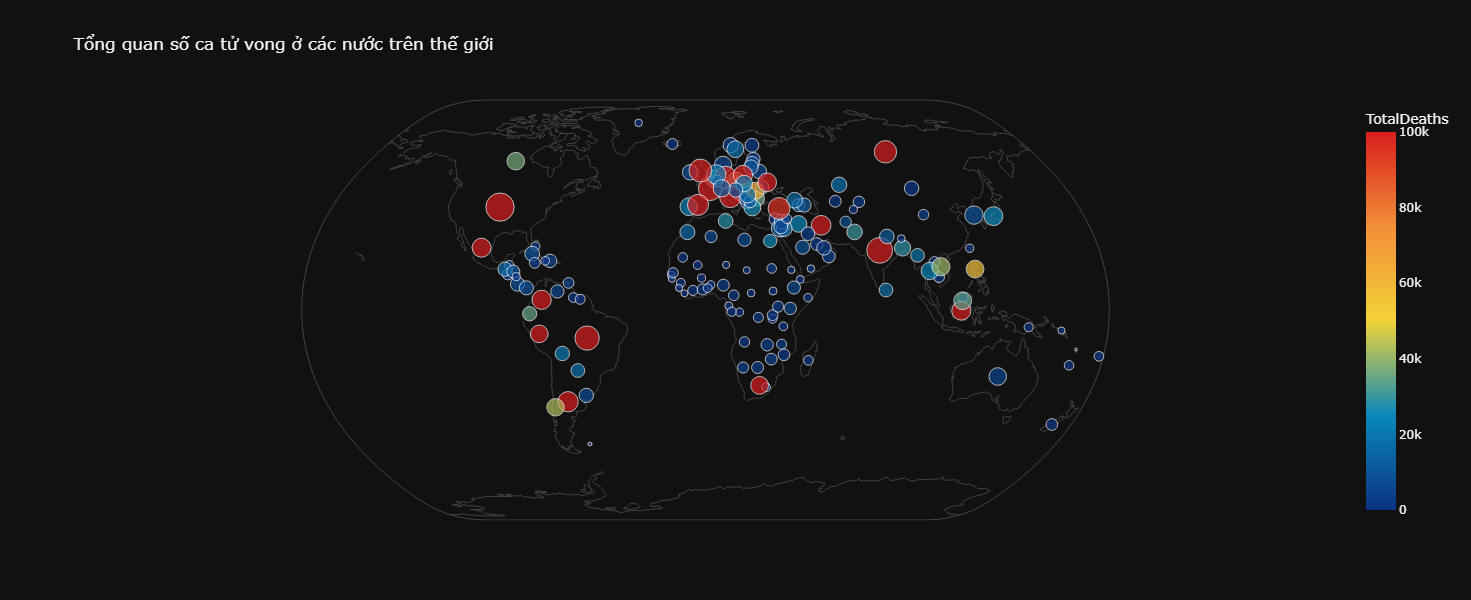

In [109]:
plot_map(covid_group_loction, "TotalDeaths", "Tổng quan số ca tử vong ở các nước trên thế giới", 'SizeDeaths', [0, 10**5])

Những quốc gia có nền kinh tế phát triển, có tổng số ca mắc nhiều như Mỹ, Nga, Anh, Ấn Độ ... thì đều có tổng số ca tử vong lớn tính đến thời điểm xét tập dữ liệu

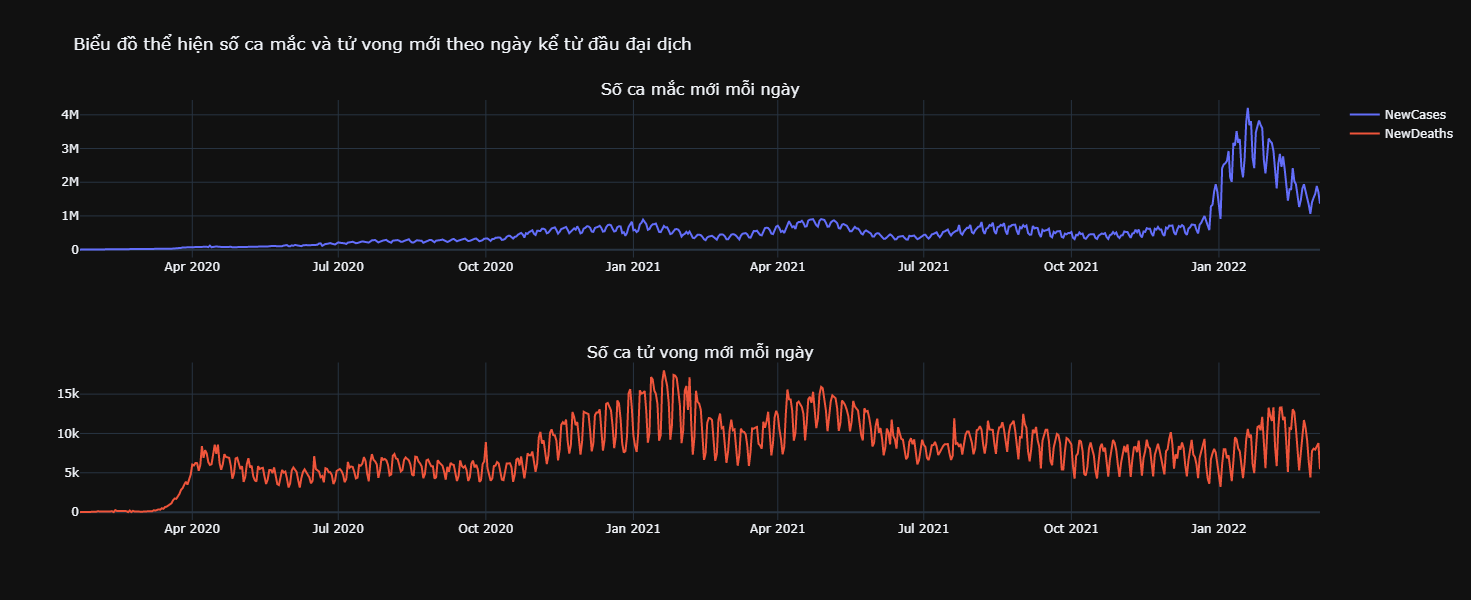

In [110]:
plot_sub_lines(covid_world_df, 'Date', 'NewCases', 'NewDeaths', "Biểu đồ thể hiện số ca mắc và tử vong mới theo ngày kể từ đầu đại dịch")

Vào khoảng cuối năm 2021, biến thể OMICRON xuất hiện làm gia tăng nhanh số ca nhiễm mới mỗi ngày nhưng số ca tử vong mới mỗi ngày của biến thể này không cao so với biến thể DELTA xuất hiện trước đó. Có lẽ do khi biến thể OMICRON xuất hiện thì độ bao phủ vaccine trên thế giới cũng đã tăng cao nên ta thấy số ca tử vong mới mỗi ngày không tăng mạnh như trước đó.

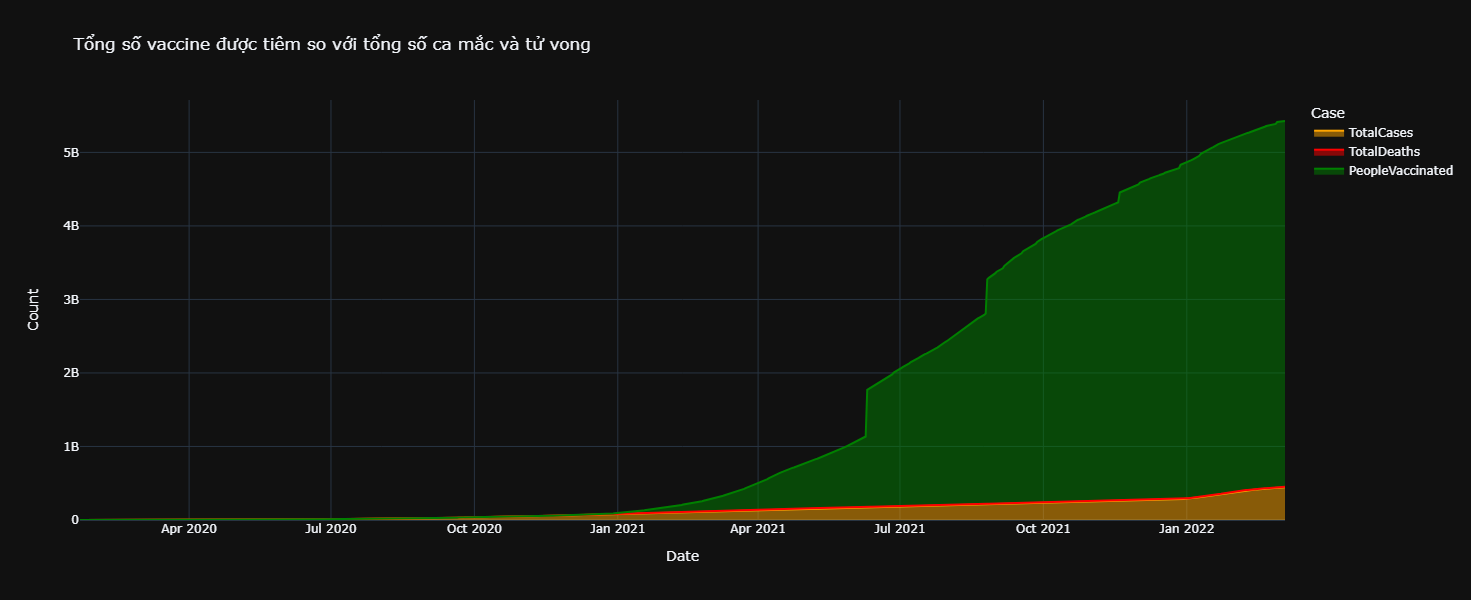

In [111]:
covid_world_df_melt = covid_world_df.melt(id_vars="Date", value_vars=['TotalCases', 'TotalDeaths', 'PeopleVaccinated'],
                 var_name='Case', value_name='Count')
fig = px.area(covid_world_df_melt, x="Date", y="Count", color='Case',
title='Tổng số vaccine được tiêm so với tổng số ca mắc và tử vong', color_discrete_sequence = ['orange', 'red','green' ])
fig.update_layout(template='plotly_dark',height=600, width= 1400)
fig.show()

Vaccine được triển khai tiêm vào khoảng cuối nắm 2020, đầu năm 2021, từ đó độ bao phủ vaccine trên toàn thế giới ngày càng lớn dần, bỏ xa tổng số ca mắc và số ca tử vong. Vaccine có thể xem công cụ hiệu quả nhất hiện tại , tiến độ tiêm phòng như vậy đang cho thấy tín hiệu tích cực trong việc phòng chống và đi tới chấm dứt đại dịch Covid-19

# Kết quả thực nghiệm

## Câu 1: Dân số có phải là nguyên nhân dẫn tới việc gia tăng số ca mắc ở các quốc gia? **(X: Population, Location)**  **(Y:TotalCases)**

<font face="Cambria Math" size=5 color = #1155cc>Suy diễn mối quan hệ giữa hai biến: 𝑄 (Population) → 𝑄 (TotalCases) bằng hệ số tương quan và đường tuyến tính </font>

In [112]:
covid_continent = covid_df.groupby(by = 'Location').agg({'Continent' : 'first','TotalCases': 'max', 'Population': 'max'})
covid_continent = covid_continent.groupby(by = "Continent").agg({'Continent' : 'first','TotalCases': 'sum', 'Population': 'sum'})
covid_continent = covid_continent[covid_continent.Continent != 0]
covid_continent

Continent   TotalCases    Population
Continent                                              
Africa                Africa   11272358.0  1.371693e+09
Asia                    Asia  120758420.0  4.652616e+09
Europe                Europe  161250675.0  7.506718e+08
North America  North America   93398426.0  5.928348e+08
Oceania              Oceania    3831683.0  4.320246e+07
South America  South America   54622339.0  4.339537e+08

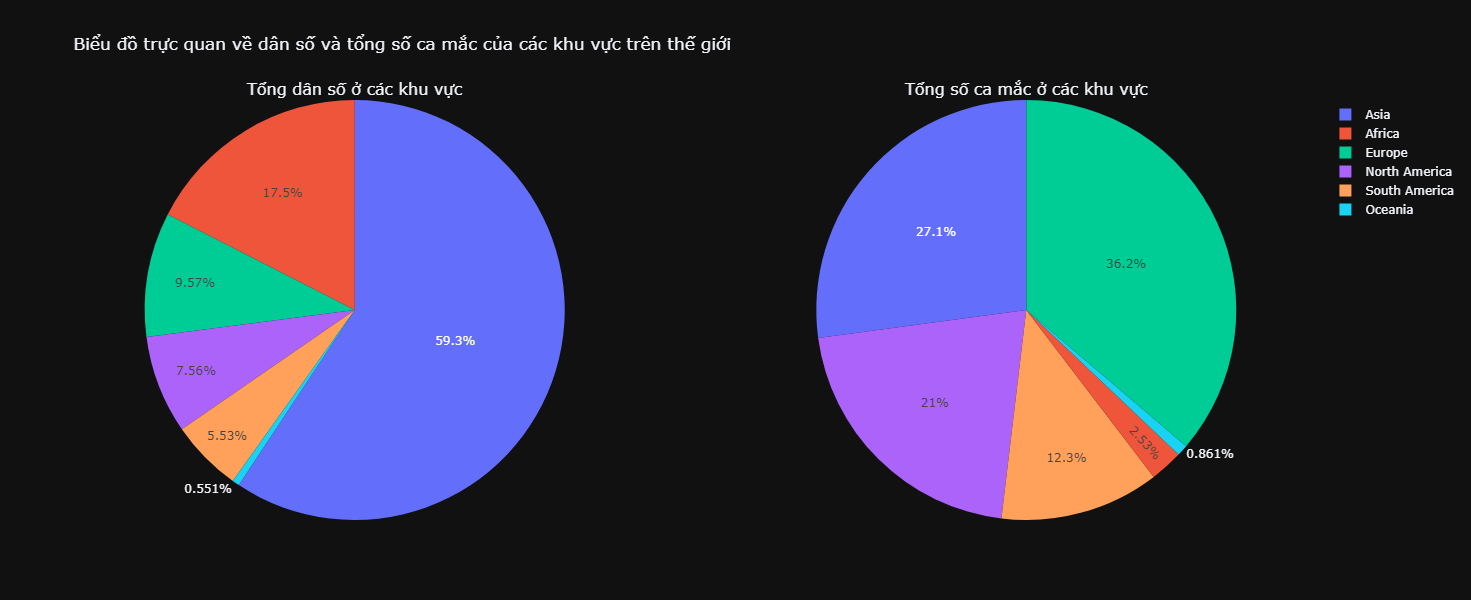

In [113]:
plot_sub_pies(covid_continent, "Population", "TotalCases","Biểu đồ trực quan về dân số và tổng số ca mắc của các khu vực trên thế giới")

Từ biểu đồ trên, ta có thể thấy châu Á là châu lục có số dân đông nhất thế giới, vượt xa các châu lục khác. 

Châu Á là nơi dự đoán có thể có số ca mắc Covid-19 nhiều nhất trên thế giới do dân số đông. 

Thế nhưng châu Âu mới là nơi có tổng số ca mắc nhiều nhất trên thế giới, tuy nhiên không bỏ quá xa châu Á


Ta thực hiện suy diễn mối quan hệ giữa hai biến số bằng biểu đồ `Scatter` để xem liệu dân số đông có phải là nguyên nhân dẫn tới gia tăng số ca mắc hay không ?

In [114]:
cases_country = covid_df.groupby(by = 'Location').agg({'Continent' : 'first','Location' : 'first', 'TotalCases': 'max', 'Population': 'max'})
cases_country = cases_country[cases_country["Continent"] != 0]
print(f"Tổng số quốc gia có báo cáo số ca mắc: {len(cases_country)}")
cases_country.head()

Tổng số quốc gia có báo cáo số ca mắc: 224


Continent     Location  TotalCases  Population
Location                                                  
Afghanistan      Asia  Afghanistan    174331.0  39835428.0
Albania        Europe      Albania    272030.0   2872934.0
Algeria        Africa      Algeria    265227.0  44616626.0
Andorra        Europe      Andorra     38434.0     77354.0
Angola         Africa       Angola     98796.0  33933611.0

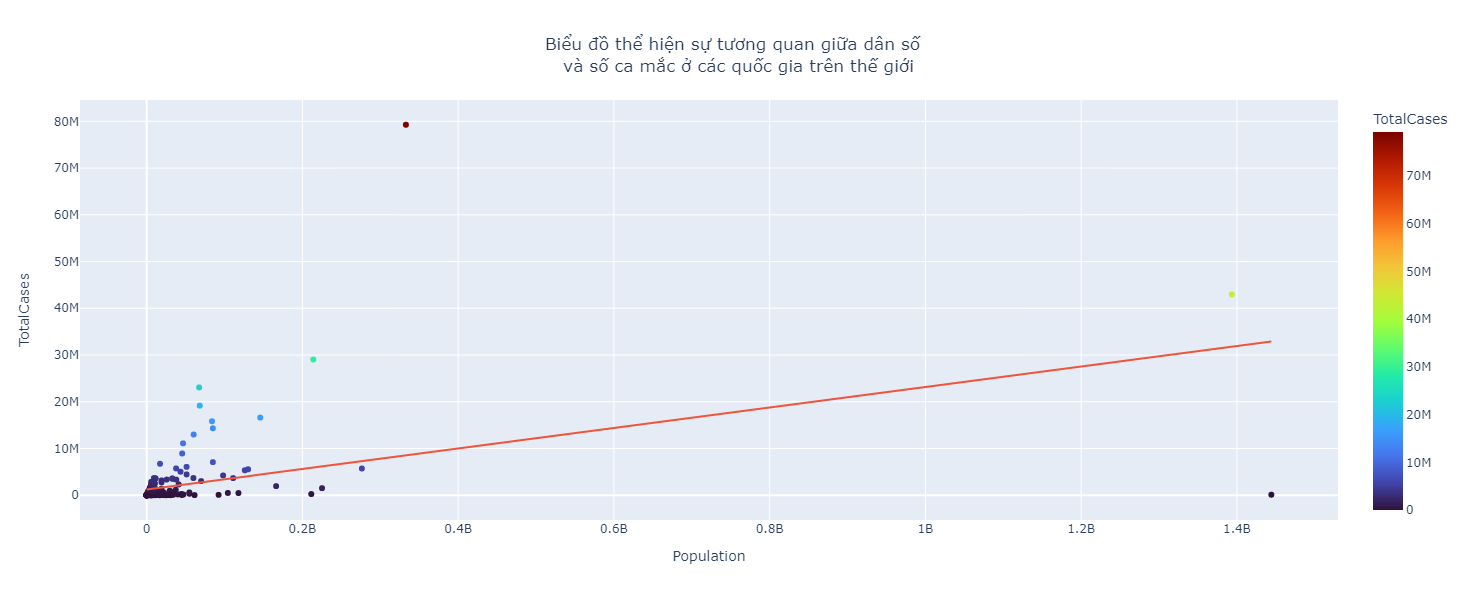

In [115]:
plot_scatter(cases_country, "Population", "TotalCases", "Biểu đồ thể hiện sự tương quan giữa dân số <br> và số ca mắc ở các quốc gia trên thế giới","Location")

Theo biểu đồ, ta thấy Hoa Kỳ có tổng số ca mắc cao nhất nhưng dân số nước này lại không cao.

Trung Quốc có số dân đông nhất thế giới và là nơi khởi nguồn dịch bệnh nhưng tổng số ca mắc lại thấp hơn nhiều

Có riêng Ấn Độ, dân số đông đồng thời số ca mắc cũng gần như rất cao, chỉ thua mỗi Hoa Kỳ.

**Ta đặt giả thuyết thống kê**

H0: Không có mối quan hệ tuyến tính giữa dân số và số ca mắc

Ha: Có mối quan hệ tuyến tính giữa dân số và số ca mắc

Ta thực hiện tính hệ số tương quan và giá trị p_value 

In [116]:
res = stats.linregress(cases_country["Population"], cases_country["TotalCases"])

In [117]:
print(f"Ta tính được giá trị P-value = {res.pvalue} < 0.05")
print(f"Ta bác bỏ H0, chấp nhận Ha")

Ta tính được giá trị P-value = 4.0350674184659014e-12 < 0.05
Ta bác bỏ H0, chấp nhận Ha


In [118]:
print(f"Tuy nhiên, vì hệ số tương quan R = {res.rvalue} không quá mạnh cũng không quá yếu, ta cũng chưa thể kết luận ngay dân số có là nguyên nhân ảnh hưởng đến số ca mắc Covid-19 ở các quốc gia trên thế giới hay không vì còn nhiều yếu tố ảnh hưởng khác như hệ thống y tế, chính sách cách ly của mỗi quốc gia...")

Tuy nhiên, vì hệ số tương quan R = 0.4418309554783007 không quá mạnh cũng không quá yếu, ta cũng chưa thể kết luận ngay dân số có là nguyên nhân ảnh hưởng đến số ca mắc Covid-19 ở các quốc gia trên thế giới hay không vì còn nhiều yếu tố ảnh hưởng khác như hệ thống y tế, chính sách cách ly của mỗi quốc gia...


## Câu 2: Có phải các nước có nền kinh tế phát triển, thu nhập cao thì dịch bệnh Covid-19 sẽ ít nghiêm trọng hơn so với các nước có nền kinh tế phát triển kém hơn, thu nhập thấp hơn không ? **(X: Location, TotalCases, TotalDeaths)**  **(Y: Tỉ lệ tử vong)**

<font face="Cambria Math" size=5 color = #1155cc>Suy diễn mối quan hệ giữa hai biến: C (Nhóm các nước có nền kinh tế phát triển và đang phát triển) → 𝑄 (Tỉ lệ tử vong) bằng thống kê T-test giữa hai nhóm độc lập </font>

In [119]:
covid_country = covid_df.copy()
covid_country = covid_country.groupby(by= 'Location').agg({'Continent': 'first', 'Location': 'first', 'TotalCases': 'max', 'TotalDeaths': 'max'})
covid_country = covid_country[covid_country.Continent != 0]

Lấy tên các quốc gia có trong dữ liệu

In [120]:
list_country = list([])
list_country = covid_country['Location'].unique().tolist()

Sắp xếp số ca mắc covid-19 từ cao xuống thấp theo các quốc gia

In [121]:
covid_country.sort_values('TotalCases', inplace= True, ascending= False)
covid_country

Continent        Location  TotalCases  TotalDeaths
Location                                                              
United States   North America   United States  79265726.0     958437.0
India                    Asia           India  42962953.0     515036.0
Brazil          South America          Brazil  29040800.0     652216.0
France                 Europe          France  23064766.0     139312.0
United Kingdom         Europe  United Kingdom  19172095.0     162152.0
...                       ...             ...         ...          ...
Nauru                 Oceania           Nauru         0.0          0.0
Guernsey               Europe        Guernsey         0.0          0.0
Tokelau               Oceania         Tokelau         0.0          0.0
Tuvalu                Oceania          Tuvalu         0.0          0.0
Niue                  Oceania            Niue         0.0          0.0

[224 rows x 4 columns]

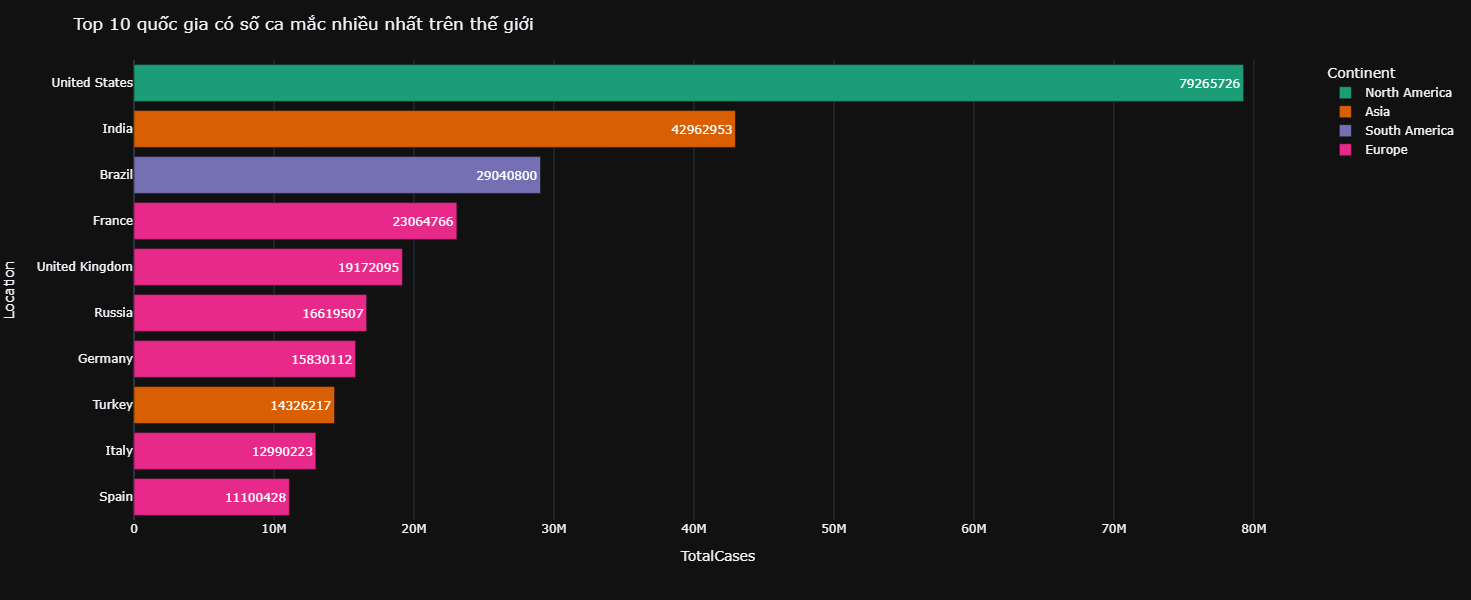

In [122]:
plot_bar(covid_country.head(10), 'TotalCases', 'Location', 'Top 10 quốc gia có số ca mắc nhiều nhất trên thế giới')

Sắp xếp số ca tử vong vì covid-19 từ cao xuống thấp theo các quốc gia

In [123]:
covid_country.sort_values('TotalDeaths', inplace= True, ascending= False)
covid_country

Continent          Location  TotalCases  TotalDeaths
Location                                                                  
United States     North America     United States  79265726.0     958437.0
Brazil            South America            Brazil  29040800.0     652216.0
India                      Asia             India  42962953.0     515036.0
Russia                   Europe            Russia  16619507.0     348467.0
Mexico            North America            Mexico   5554392.0     319604.0
...                         ...               ...         ...          ...
Samoa                   Oceania             Samoa        33.0          0.0
Macao                      Asia             Macao        82.0          0.0
Falkland Islands  South America  Falkland Islands       115.0          0.0
Tonga                   Oceania             Tonga       898.0          0.0
Niue                    Oceania              Niue         0.0          0.0

[224 rows x 4 columns]

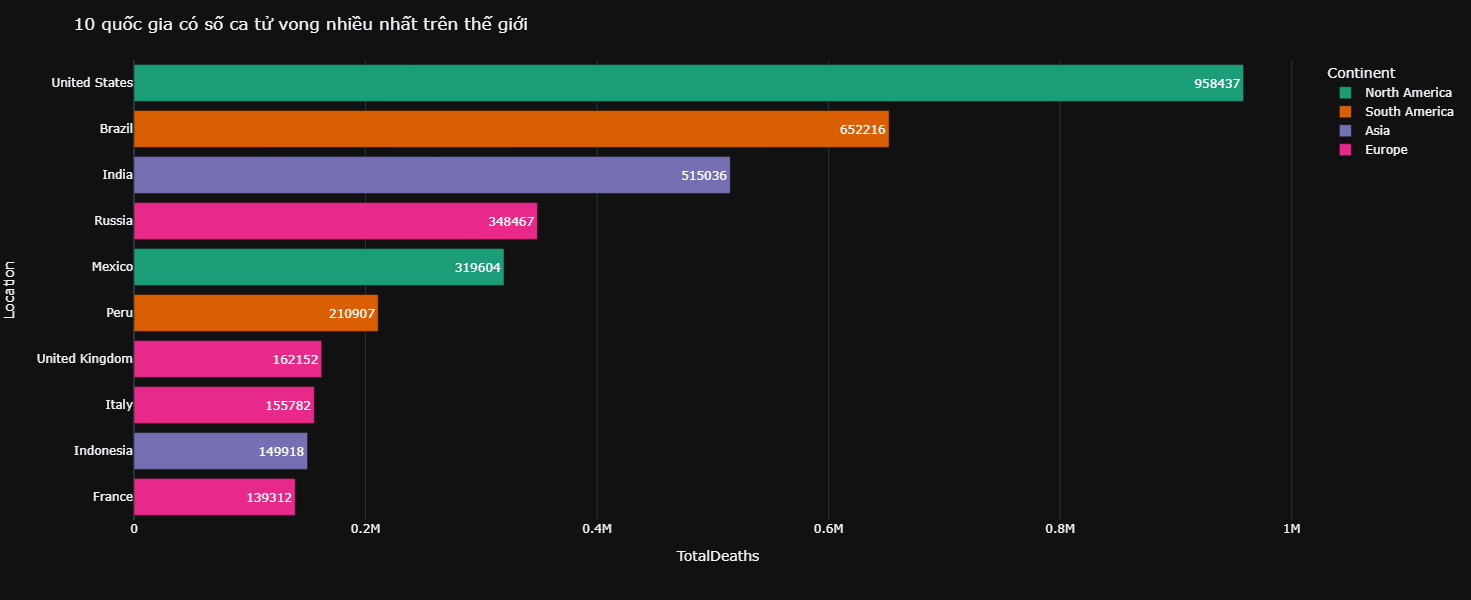

In [124]:
plot_bar(covid_country.head(10), 'TotalDeaths', 'Location', '10 quốc gia có số ca tử vong nhiều nhất trên thế giới')

Từ biểu đồ trên, ta có thể thấy được các nước có nền kinh tế phát triển như Mỹ, Anh, Nga, Ấn Độ, Canada... đều có tổng số ca mắc và tử vong cao

Tính tỷ lệ tử vong vì dịch bệnh của các quốc gia trên thế giới

In [125]:
covid_country['Mortality'] = round((covid_country['TotalDeaths']/covid_country['TotalCases']), 4)

Clean data

In [126]:
covid_country = covid_country.replace('', np.nan).fillna(0)

In [127]:
print("Tỷ lệ tử vong vì dịch bệnh ở các quốc gia trên thế giới")
covid_country

Tỷ lệ tử vong vì dịch bệnh ở các quốc gia trên thế giới


Continent          Location  TotalCases  TotalDeaths  \
Location                                                                     
United States     North America     United States  79265726.0     958437.0   
Brazil            South America            Brazil  29040800.0     652216.0   
India                      Asia             India  42962953.0     515036.0   
Russia                   Europe            Russia  16619507.0     348467.0   
Mexico            North America            Mexico   5554392.0     319604.0   
...                         ...               ...         ...          ...   
Samoa                   Oceania             Samoa        33.0          0.0   
Macao                      Asia             Macao        82.0          0.0   
Falkland Islands  South America  Falkland Islands       115.0          0.0   
Tonga                   Oceania             Tonga       898.0          0.0   
Niue                    Oceania              Niue         0.0          0.0   

                  Mortality  
Location                     
United States        0.0121  
Brazil               0.0225  
India                0.0120  
Russia               0.0210  
Mexico               0.0575  
...                     ...  
Samoa                0.0000  
Macao                0.0000  
Falkland Islands     0.0000  
Tonga                0.0000  
Niue                 0.0000  

[224 rows x 5 columns]

Chọn một số nước có nền kinh tế phát triển và kém phát triển

In [128]:
list_top_35_countries_by_GDP_in_2022 = list(['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Canada', 'Italy', 'Brazil', 'Russia', 'South Korea', 'Australia', 'Iran', 'Spain', 'Mexico', 'Indonesia', 'Saudi Arabia', 'Netherlands', 'Switzerland', 'Taiwan', 'Poland', 'Turkey', 'Sweden', 'Belgium', 'Argentina', 'Norway', 'Thailand', 'Israel', 'Ireland', 'Malaysia', 'United Arab Emirates', 'Austria', 'South Africa', 'Singapore'])

list_worst_35_countries_by_GDP_in_2022 = list(['Vietnam', 'Hong Kong', 'Luxembourg', 'Libya', 'Namibia', 'Kosovo', 'Togo', 'Congo', 'Latvia', 'New Zealand', 'Uruguay', 'South Sudan', 'San Marino', 'Gambia', 'Curacao', 'Sierra Leone', 'New Caledonia', 'Mauritius', 'Chad', 'North Macedonia', 'Syria', 'Malta', 'Laos', 'Albania', 'Afghanistan', 'Zambia', 'Myanmar', 'Cuba', 'Ukraine', 'Qatar', 'Colombia', 'Pakistan', 'Chile', 'Finland', 'Belize'])


covid_data_poor = pd.DataFrame()
covid_data_rick = pd.DataFrame()
def create_data (data, list):
    for i in list:
        data = pd.concat([data, covid_country.loc[covid_country['Location'] == i]]) 
    return data
covid_data_rick = create_data(covid_data_rick, list_top_35_countries_by_GDP_in_2022)
covid_data_poor = create_data(covid_data_poor, list_worst_35_countries_by_GDP_in_2022)

In [129]:
print("35 nước có nền kinh tế phát triển: \n")
print(list_top_35_countries_by_GDP_in_2022)

35 nước có nền kinh tế phát triển: 

['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Canada', 'Italy', 'Brazil', 'Russia', 'South Korea', 'Australia', 'Iran', 'Spain', 'Mexico', 'Indonesia', 'Saudi Arabia', 'Netherlands', 'Switzerland', 'Taiwan', 'Poland', 'Turkey', 'Sweden', 'Belgium', 'Argentina', 'Norway', 'Thailand', 'Israel', 'Ireland', 'Malaysia', 'United Arab Emirates', 'Austria', 'South Africa', 'Singapore']


In [130]:
print("35 nước có nền kinh tế đang phát triển: \n")
print(list_worst_35_countries_by_GDP_in_2022)

35 nước có nền kinh tế đang phát triển: 

['Vietnam', 'Hong Kong', 'Luxembourg', 'Libya', 'Namibia', 'Kosovo', 'Togo', 'Congo', 'Latvia', 'New Zealand', 'Uruguay', 'South Sudan', 'San Marino', 'Gambia', 'Curacao', 'Sierra Leone', 'New Caledonia', 'Mauritius', 'Chad', 'North Macedonia', 'Syria', 'Malta', 'Laos', 'Albania', 'Afghanistan', 'Zambia', 'Myanmar', 'Cuba', 'Ukraine', 'Qatar', 'Colombia', 'Pakistan', 'Chile', 'Finland', 'Belize']


In [131]:
covid_data_poor = covid_data_poor[['TotalCases', 'TotalDeaths', 'Mortality']]
covid_data_poor['economy'] = 'median'

covid_data_rick = covid_data_rick[['TotalCases', 'TotalDeaths', 'Mortality']]
covid_data_rick['economy'] = 'height'
covid_data_economy = covid_data_poor
covid_data_economy = pd.concat([covid_data_economy, covid_data_rick])
covid_data_economy

TotalCases  TotalDeaths  Mortality economy
Location                                                        
Vietnam                4232520.0      40726.0     0.0096  median
Hong Kong               440609.0       1774.0     0.0040  median
Luxembourg              186360.0        996.0     0.0053  median
Libya                   497279.0       6288.0     0.0126  median
Namibia                 157324.0       4013.0     0.0255  median
...                          ...          ...        ...     ...
Malaysia               3595172.0      33173.0     0.0092  height
United Arab Emirates    882477.0       2301.0     0.0026  height
Austria                2839297.0      14986.0     0.0053  height
South Africa           3683172.0      99543.0     0.0270  height
Singapore               819663.0       1073.0     0.0013  height

[70 rows x 4 columns]

In [132]:
def plt_boxplot (data, title):
    plt.figure(figsize = (10, 10))
    sns.boxplot(y='Mortality', x = 'economy', data= data).set(title= title)
    sns.swarmplot(x='economy', y='Mortality', data=data, color='red')
    plt.show()

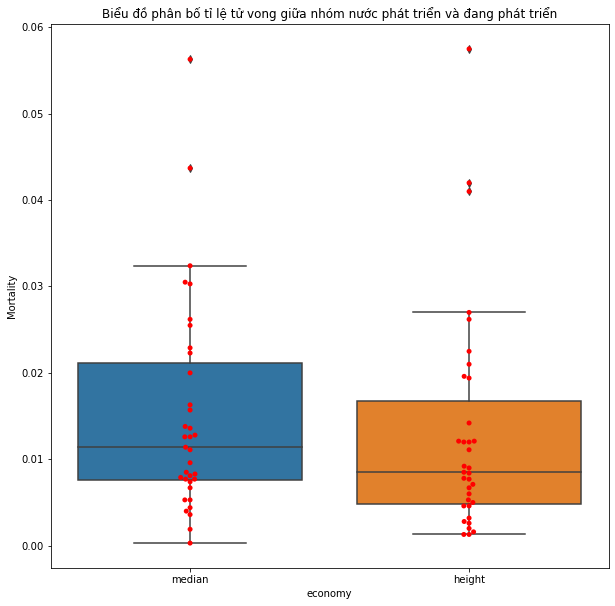

Nhận xét:
Qua biểu đồ Boxplot ta thấy miền giá trị của tỷ lệ tử vong do dịch bệnh, cùng với tỷ lệ tử vong trung bình của nhóm nước có nền kinh tế đang phát triển lớn hơn các nước phát triển


In [133]:
plt_boxplot (covid_data_economy, 'Biểu đồ phân bố tỉ lệ tử vong giữa nhóm nước phát triển và đang phát triển')
print("Nhận xét:")
print("Qua biểu đồ Boxplot ta thấy miền giá trị của tỷ lệ tử vong do dịch bệnh, cùng với tỷ lệ tử vong trung bình của nhóm nước có nền kinh tế đang phát triển lớn hơn các nước phát triển")

Thực hiện kiểm định thống kê cho 2 nhóm các quốc gia có nền kinh tế phát triển và nền kinh tế đang phát triển

Mối quan hệ giữa hai biến `C (Nhóm kinh tế) --> Q (Tỉ lệ tử vong)`: hai nhóm độc lập => Ta thực hiện thống kê `T-test`

**Ta đặt giả thuyết thống kê**

`H0: tỉ lệ tử vong tại nhóm quốc gia phát triển và nhóm các quốc gia đang phát triển là như nhau.`

`Ha: tỉ lệ tử vong tại nhóm quốc gia phát triển sẽ cao hơn so với các quốc gia đang phát triển.`

In [134]:
t, p = stats.ttest_ind(covid_data_rick['Mortality'], covid_data_poor['Mortality'])
print ('Giá trị p tính được là kiểm định hai phía: p = ', p)
print ('Vì ta kiểm định 1 phía nên p value = p/2 = ', p/2)
p = p/2
print (f'Ta có p_value = {p} > 0,05 => không thể bác bỏ giả thuyết H0')

Giá trị p tính được là kiểm định hai phía: p =  0.49304175868581457
Vì ta kiểm định 1 phía nên p value = p/2 =  0.24652087934290728
Ta có p_value = 0.24652087934290728 > 0,05 => không thể bác bỏ giả thuyết H0


Nhận xét: 
1. Kết luận trên cho thấy không có mối quan hệ giữa nền kinh tế và tỉ lệ tử vong vì dịch bệnh Covid-19 ở các nước. 
2. Có lẽ kinh tế không phải nhân tố quyết định mức độ nghiêm trọng của dịch covid-19. Mức độ nghiêm trọng của dịch covid ngoài nền kinh tế thì còn một số nguyên nhân quan trọng khác, ví dụ như: Chính sách phòng chống dịch bệnh của các quốc gia, thời tiết của mỗi khu vực và sức khỏe của dân cư.

## Câu 3: Khi vaccine được phổ biến, điều đó có giúp ích cho việc chống đại dịch Covid-19 trên thế giới? **(X: Date, PeopleVaccinated, NewCases, NewDeaths)**  **(Y: Tỉ lệ tử vong)**

<font face="Cambria Math" size=5 color = #1155cc>Suy diễn mối quan hệ giữa hai biến: C (Nhóm các ngày trước và sau tiêm vaccine) → 𝑄 (Tỉ lệ tử vong) bằng thống kê T-test giữa hai nhóm độc lập </font>

<font face="Cambria Math" size=5 color = #1155cc>Tính hệ số tương quan R để xem xét độ mạnh yếu của đường tuyến tính giữa hai nhóm biến số (`NewCases`, `PeopleVaccinated`) và (`NewDeaths`, `PeopleVaccinated`) để xem xét sự hiệu quả của việc triển khai tiêm vaccine</font>

In [135]:
first_date_vaccine = covid_world_df[covid_world_df['PeopleVaccinated'] != 0].iloc[0]['Date']
print(f"Vaccine được đưa vào sử dụng đầu tiên vào ngày {first_date_vaccine}")

Vaccine được đưa vào sử dụng đầu tiên vào ngày 2020-12-04


Tình hình dịch bệnh trên thế giới sau khi triển khai tiêm vaccine

In [136]:
covid_world_after_vaccine = covid_world_df[covid_world_df['Date'] >= first_date_vaccine]
covid_world_after_vaccine.head()

Continent Location        Date  TotalCases  NewCases  \
163740         0    World  2020-12-04  66049040.0  688697.0   
163741         0    World  2020-12-05  66697974.0  648934.0   
163742         0    World  2020-12-06  67234273.0  536299.0   
163743         0    World  2020-12-07  67761913.0  527640.0   
163744         0    World  2020-12-08  68405171.0  643258.0   

        TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
163740                8387.216                87.454    1576378.0    12460.0   
163741                8469.621                82.405    1586715.0    10337.0   
163742                8537.723                68.102    1594444.0     7729.0   
163743                8604.725                67.002    1603158.0     8714.0   
163744                8686.409                81.684    1615473.0    12317.0   

        TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
163740                  200.176                  1.582                1.0   
163741                  201.488                  1.313                1.0   
163742                  202.470                  0.981                1.0   
163743                  203.577                  1.107                2.0   
163744                  205.140                  1.564                8.0   

        PeopleVaccinated  PeopleFullyVaccinated  \
163740               1.0                    0.0   
163741               1.0                    0.0   
163742               1.0                    0.0   
163743               2.0                    0.0   
163744               8.0                    0.0   

        PeopleFullyVaccinated_per_hundred    Population  
163740                                0.0  7.874966e+09  
163741                                0.0  7.874966e+09  
163742                                0.0  7.874966e+09  
163743                                0.0  7.874966e+09  
163744                                0.0  7.874966e+09

Tình hình dịch bệnh trên thế giới trước khi triển khai tiêm vaccine

In [137]:
covid_world_before_vaccine = covid_world_df[covid_world_df['Date'] < first_date_vaccine]
covid_world_before_vaccine.tail()

Continent Location        Date  TotalCases  NewCases  \
163735         0    World  2020-11-29  62890192.0  482385.0   
163736         0    World  2020-11-30  63397591.0  507399.0   
163737         0    World  2020-12-01  64021419.0  623828.0   
163738         0    World  2020-12-02  64668183.0  646764.0   
163739         0    World  2020-12-03  65360343.0  692160.0   

        TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
163735                7986.091                61.256    1516949.0     7295.0   
163736                8050.523                64.432    1525916.0     8967.0   
163737                8129.739                79.217    1538675.0    12759.0   
163738                8211.868                82.129    1551318.0    12643.0   
163739                8299.762                87.894    1563918.0    12600.0   

        TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
163735                  192.629                  0.926                0.0   
163736                  193.768                  1.139                0.0   
163737                  195.388                  1.620                0.0   
163738                  196.994                  1.605                0.0   
163739                  198.594                  1.600                0.0   

        PeopleVaccinated  PeopleFullyVaccinated  \
163735               0.0                    0.0   
163736               0.0                    0.0   
163737               0.0                    0.0   
163738               0.0                    0.0   
163739               0.0                    0.0   

        PeopleFullyVaccinated_per_hundred    Population  
163735                                0.0  7.874966e+09  
163736                                0.0  7.874966e+09  
163737                                0.0  7.874966e+09  
163738                                0.0  7.874966e+09  
163739                                0.0  7.874966e+09

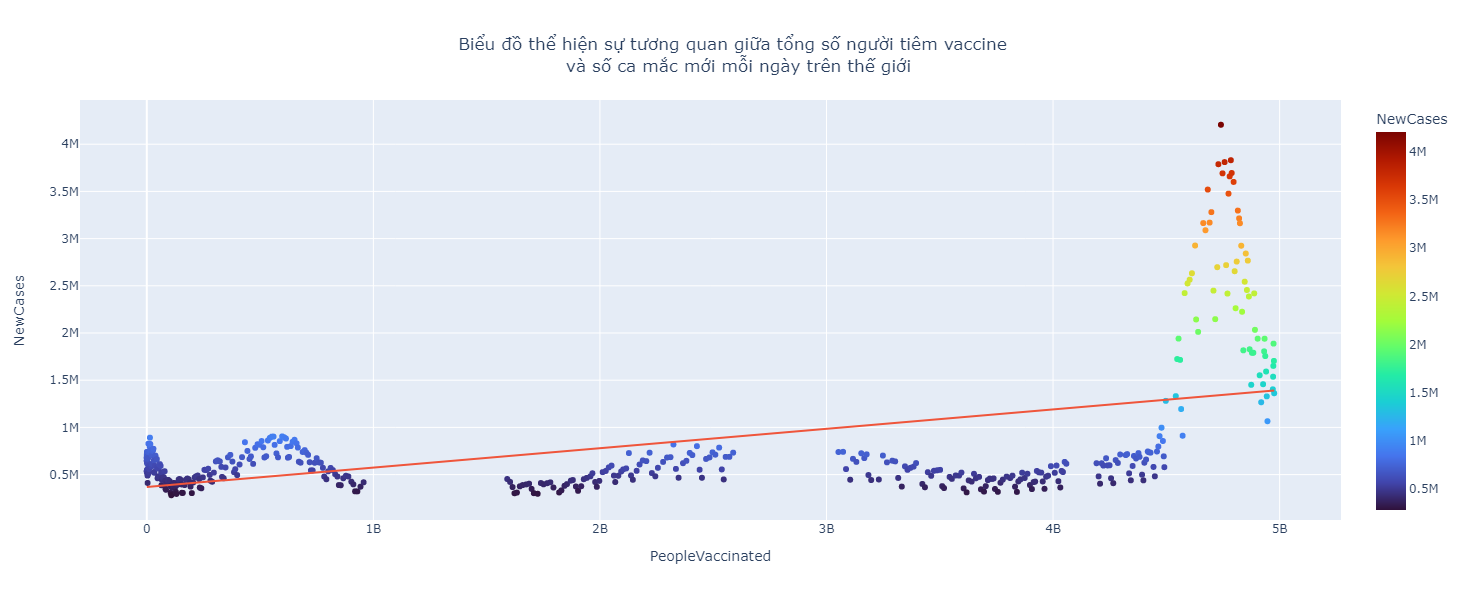

In [138]:
plot_scatter(covid_world_after_vaccine, "PeopleVaccinated", "NewCases", "Biểu đồ thể hiện sự tương quan giữa tổng số người tiêm vaccine <br> và số ca mắc mới mỗi ngày trên thế giới", "Date")

In [139]:
res = stats.linregress(covid_world_after_vaccine["PeopleVaccinated"],covid_world_after_vaccine["NewCases"])
print(f"Tuy hệ số tương quan R = {res.rvalue} không mạnh nhưng đường tuyến tính là đồng biến, ta vẫn có thể thấy số ca mắc mới mỗi ngày vẫn tăng khi số lượng người thực hiện tiêm vaccine tăng lên.")
print(f"Tuy nhiên, để đánh giá mức độ giúp ích của vaccine, ta hãy xét về số ca tử vong mỗi ngày sau khi tiến hành tiêm vaccine.")

Tuy hệ số tương quan R = 0.5081608318814392 không mạnh nhưng đường tuyến tính là đồng biến, ta vẫn có thể thấy số ca mắc mới mỗi ngày vẫn tăng khi số lượng người thực hiện tiêm vaccine tăng lên.
Tuy nhiên, để đánh giá mức độ giúp ích của vaccine, ta hãy xét về số ca tử vong mỗi ngày sau khi tiến hành tiêm vaccine.


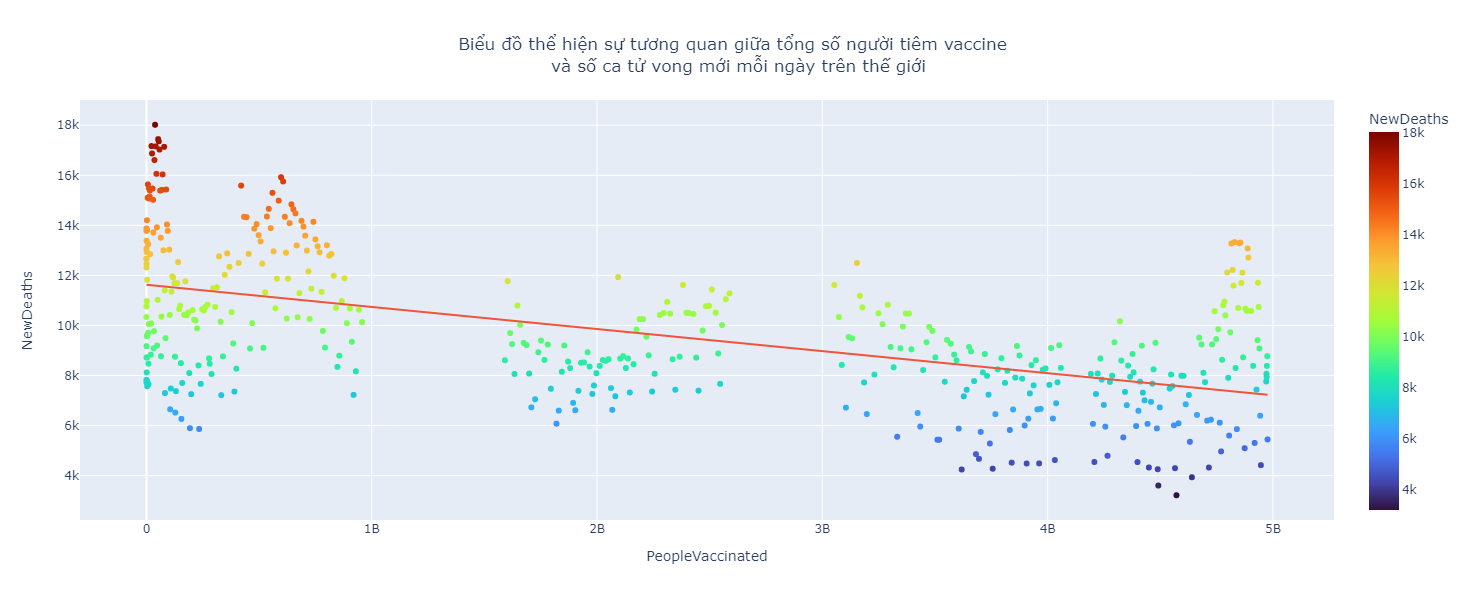

In [140]:
plot_scatter(covid_world_after_vaccine, "PeopleVaccinated", "NewDeaths", "Biểu đồ thể hiện sự tương quan giữa tổng số người tiêm vaccine <br> và số ca tử vong mới mỗi ngày trên thế giới", "Date")

In [141]:
res = stats.linregress(covid_world_after_vaccine["PeopleVaccinated"],covid_world_after_vaccine["NewDeaths"])
print(f"Ta thấy đường khớp dữ liệu là nghịch biến, và hệ số tương quan R = {res.rvalue} cũng không mạnh. Do đó, vaccine phần nào đã giúp khống chế số ca tử vong mỗi ngày trên thế giới.")
print(f"Điều đó cũng cho thấy vaccine đang thực sự giúp ích cho việc chống đại dịch Covid-19 trên thế giới")

Ta thấy đường khớp dữ liệu là nghịch biến, và hệ số tương quan R = -0.5537746649965218 cũng không mạnh. Do đó, vaccine phần nào đã giúp khống chế số ca tử vong mỗi ngày trên thế giới.
Điều đó cũng cho thấy vaccine đang thực sự giúp ích cho việc chống đại dịch Covid-19 trên thế giới


Tính tỉ lệ tử vong mỗi ngày trước và sau khi tiêm vaccine

In [142]:
covid_world_before_vaccine["Mortality"] = round((covid_world_before_vaccine['NewDeaths']/covid_world_before_vaccine['NewCases']), 4)
covid_world_after_vaccine["Mortality"] = round((covid_world_after_vaccine['NewDeaths']/covid_world_after_vaccine['NewCases']), 4)


C:\Users\nguye\AppData\Local\Temp\ipykernel_20392\4284733332.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nguye\AppData\Local\Temp\ipykernel_20392\4284733332.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
covid_world_before_vaccine = covid_world_before_vaccine.replace('', np.nan).fillna(0)
covid_world_after_vaccine = covid_world_after_vaccine.replace('', np.nan).fillna(0)

In [144]:
covid_world_before_vaccine.head()

Continent Location        Date  TotalCases  NewCases  \
163423          0    World  2020-01-22       557.0       0.0   
163424          0    World  2020-01-23       657.0     100.0   
163425          0    World  2020-01-24       944.0     287.0   
163426          0    World  2020-01-25      1437.0     493.0   
163427          0    World  2020-01-26      2120.0     683.0   

        TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
163423                   0.071                 0.000         17.0        0.0   
163424                   0.083                 0.013         18.0        1.0   
163425                   0.120                 0.036         26.0        8.0   
163426                   0.182                 0.063         42.0       16.0   
163427                   0.269                 0.087         56.0       14.0   

        TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
163423                    0.002                  0.000                0.0   
163424                    0.002                  0.000                0.0   
163425                    0.003                  0.001                0.0   
163426                    0.005                  0.002                0.0   
163427                    0.007                  0.002                0.0   

        PeopleVaccinated  PeopleFullyVaccinated  \
163423               0.0                    0.0   
163424               0.0                    0.0   
163425               0.0                    0.0   
163426               0.0                    0.0   
163427               0.0                    0.0   

        PeopleFullyVaccinated_per_hundred    Population  Mortality  
163423                                0.0  7.874966e+09     0.0000  
163424                                0.0  7.874966e+09     0.0100  
163425                                0.0  7.874966e+09     0.0279  
163426                                0.0  7.874966e+09     0.0325  
163427                                0.0  7.874966e+09     0.0205

In [145]:
covid_world_after_vaccine.head()

Continent Location        Date  TotalCases  NewCases  \
163740          0    World  2020-12-04  66049040.0  688697.0   
163741          0    World  2020-12-05  66697974.0  648934.0   
163742          0    World  2020-12-06  67234273.0  536299.0   
163743          0    World  2020-12-07  67761913.0  527640.0   
163744          0    World  2020-12-08  68405171.0  643258.0   

        TotalCases_per_million  NewCases_per_million  TotalDeaths  NewDeaths  \
163740                8387.216                87.454    1576378.0    12460.0   
163741                8469.621                82.405    1586715.0    10337.0   
163742                8537.723                68.102    1594444.0     7729.0   
163743                8604.725                67.002    1603158.0     8714.0   
163744                8686.409                81.684    1615473.0    12317.0   

        TotalDeaths_per_million  NewDeaths_per_million  TotalVaccinations  \
163740                  200.176                  1.582                1.0   
163741                  201.488                  1.313                1.0   
163742                  202.470                  0.981                1.0   
163743                  203.577                  1.107                2.0   
163744                  205.140                  1.564                8.0   

        PeopleVaccinated  PeopleFullyVaccinated  \
163740               1.0                    0.0   
163741               1.0                    0.0   
163742               1.0                    0.0   
163743               2.0                    0.0   
163744               8.0                    0.0   

        PeopleFullyVaccinated_per_hundred    Population  Mortality  
163740                                0.0  7.874966e+09     0.0181  
163741                                0.0  7.874966e+09     0.0159  
163742                                0.0  7.874966e+09     0.0144  
163743                                0.0  7.874966e+09     0.0165  
163744                                0.0  7.874966e+09     0.0191

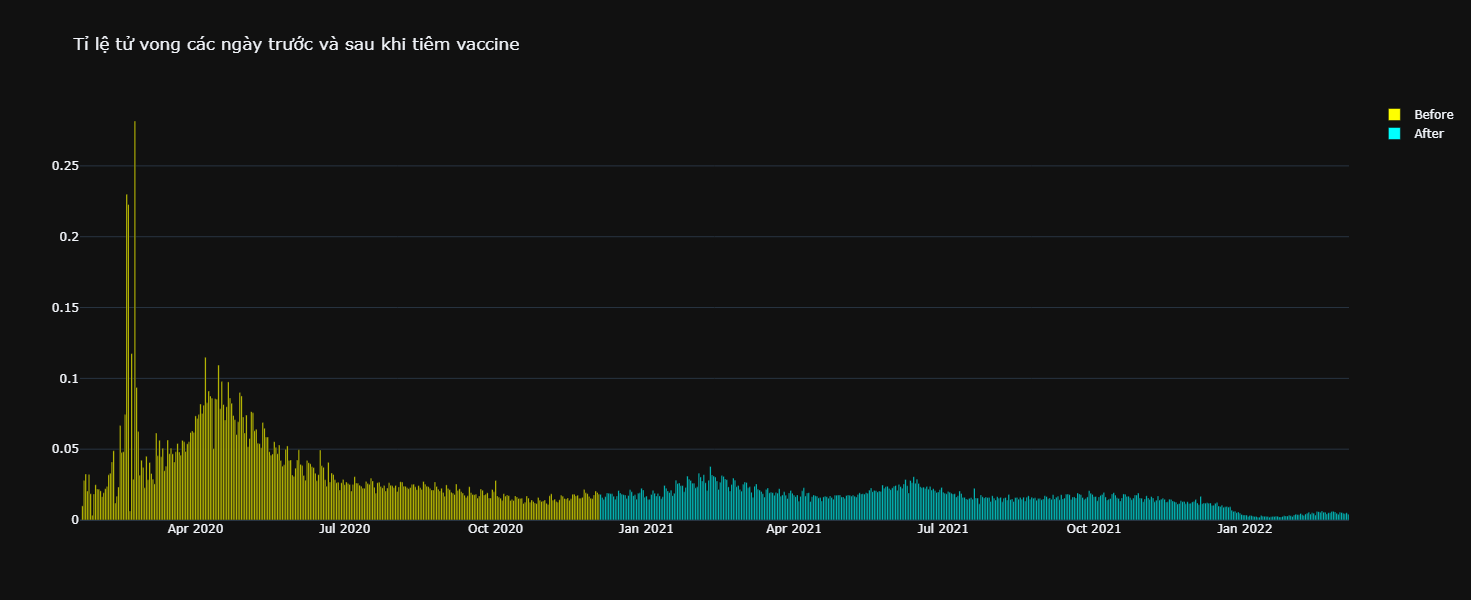

Từ biểu đồ ta cũng có thể thấy được rằng tỉ lệ tử vong vì Covid-19 trước khi tiêm vaccine lớn hớn so với sau khi tiêm vaccine.


In [146]:
plot_ticks_vaccine("Tỉ lệ tử vong các ngày trước và sau khi tiêm vaccine")
print("Từ biểu đồ ta cũng có thể thấy được rằng tỉ lệ tử vong vì Covid-19 trước khi tiêm vaccine lớn hớn so với sau khi tiêm vaccine.")

Để có thể đưa ra kết luận chắc chắn, ta thực hiện kiểm định thống kê T-test `C (Nhóm ngày trước và sau tiêm vaccine) --> Q (Tỷ lệ tử vong)`(2 nhóm độc lập): tỉ lệ tử vong vì dịch bệnh các ngày trước và sau khi tiêm vaccine trên thế giới.

Ta đặt giả thuyết:

`H0: tỉ lệ tử vong các ngày trước và sau khi tiêm vaccine là như nhau`

`Ha: tỉ lệ tử vong các ngày trước khi tiêm vaccine cao hơn sau khi tiêm.`

In [147]:
t, p = stats.ttest_ind(covid_world_before_vaccine['Mortality'], covid_world_after_vaccine['Mortality'])
print ('Giá trị p tính được là kiểm định hai phía: p = ', p)
print ('Vì ta kiểm định 1 phía nên p_value = p/2 = ', p/2)
p = p/2
print (f'Ta có p_value = {p} < 0,05 và t = {t} > 0 => Ta bác bỏ giả thuyết H0, chấp nhận Ha')

Giá trị p tính được là kiểm định hai phía: p =  1.3756703062376602e-39
Vì ta kiểm định 1 phía nên p_value = p/2 =  6.878351531188301e-40
Ta có p_value = 6.878351531188301e-40 < 0,05 và t = 13.945868874153058 > 0 => Ta bác bỏ giả thuyết H0, chấp nhận Ha


Tính khoảng tin cậy 95% cho trung bình

In [148]:
CI_vaccine = get_confident_interval(covid_world_before_vaccine['Mortality'], covid_world_after_vaccine['Mortality'])
print(f"Khoảng tin cậy 95% cho trung bình tỉ lệ tử vong của các ngày trước so với các ngày sau khi tiêm vaccine: {CI_vaccine}. Hay nói cách khác, trung bình tỉ lệ tử vong vì Covid-19 các ngày trước lớn hơn các ngày sau khi tiêm vaccine trong khoảng đó")

Khoảng tin cậy 95% cho trung bình tỉ lệ tử vong của các ngày trước so với các ngày sau khi tiêm vaccine: (0.020231343924245682, 0.020610953599724247). Hay nói cách khác, trung bình tỉ lệ tử vong vì Covid-19 các ngày trước lớn hơn các ngày sau khi tiêm vaccine trong khoảng đó


Nhận xét: Vậy tỉ lệ tử vong trên thế giới ở thời điểm trước khi tiêm vaccine cao hơn sau khi đã triển khai tiêm vaccine. Do đó, vaccine dường như thực sự có ích trong việc chống đại dịch Covid-19 trên thế giới

## Câu 4: Biến thể Omicron xuất hiện vào khoảng 11/2021 có gây nguy hiểm không? So sánh với biến thể Delta xuất hiện vào tháng 12/2020. **(X: Date, NewCases, NewDeaths)**  **(Y: Tỉ lệ tử vong)**

<font face="Cambria Math" size=5 color = #1155cc>Suy diễn mối quan hệ giữa hai biến: C (Nhóm các ngày xuất hiện hai biến thể DELTA và OMICRON) → 𝑄 (Tỉ lệ tử vong) bằng thống kê T-test giữa hai nhóm độc lập </font>

<font face="Cambria Math" size=5 color = #1155cc>Tính hệ số tương quan R để xem xét độ mạnh yếu của đường tuyến tính giữa hai biến số `NewCases` và `NewDeaths` của hai loại biển thể DELTA và OMICRON</font>

In [149]:
covid_compare = covid_world_df[['Date', 'NewCases', 'NewDeaths']]
covid_compare['Date'] = pd.to_datetime(covid_compare['Date'])
covid_compare['Month_Years']=pd.to_datetime(covid_compare['Date']).dt.strftime('%Y-%m')
covid_compare['Mortality'] = covid_compare['NewDeaths'] / covid_compare['NewCases']
covid_compare = covid_compare.replace('', np.nan).fillna(0)
covid_compare

C:\Users\nguye\AppData\Local\Temp\ipykernel_20392\3503548437.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nguye\AppData\Local\Temp\ipykernel_20392\3503548437.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nguye\AppData\Local\Temp\ipykernel_20392\3503548437.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Date   NewCases  NewDeaths Month_Years  Mortality
163423 2020-01-22        0.0        0.0     2020-01   0.000000
163424 2020-01-23      100.0        1.0     2020-01   0.010000
163425 2020-01-24      287.0        8.0     2020-01   0.027875
163426 2020-01-25      493.0       16.0     2020-01   0.032454
163427 2020-01-26      683.0       14.0     2020-01   0.020498
...           ...        ...        ...         ...        ...
164192 2022-03-01  1536867.0     8069.0     2022-03   0.005250
164193 2022-03-02  1651452.0     7945.0     2022-03   0.004811
164194 2022-03-03  1887465.0     8384.0     2022-03   0.004442
164195 2022-03-04  1704138.0     8771.0     2022-03   0.005147
164196 2022-03-05  1361810.0     5443.0     2022-03   0.003997

[774 rows x 5 columns]

In [150]:
date_omicron = pd.to_datetime(datetime.date(2021,11,11)).strftime('%Y-%m')
date_delta = pd.to_datetime(datetime.date(2020,12,1)).strftime('%Y-%m')
date_bound = pd.to_datetime(datetime.date(2022,3,1)).strftime('%Y-%m')
covid_compare = covid_compare[covid_compare["Month_Years"] < date_bound]
covid_omicron = covid_compare[covid_compare["Month_Years"] >= date_omicron]
covid_delta = covid_compare[covid_compare["Month_Years"] < date_omicron]
covid_delta = covid_delta[covid_delta["Month_Years"] >= date_delta]

In [151]:
covid_compare.dtypes

Date           datetime64[ns]
NewCases              float64
NewDeaths             float64
Month_Years            object
Mortality             float64
dtype: object

In [152]:
print("Tình hình dịch bệnh khi biến chủng DELTA xuất hiện khoảng tháng 12/2020")
print(covid_delta)

Tình hình dịch bệnh khi biến chủng DELTA xuất hiện khoảng tháng 12/2020
             Date  NewCases  NewDeaths Month_Years  Mortality
163737 2020-12-01  623828.0    12759.0     2020-12   0.020453
163738 2020-12-02  646764.0    12643.0     2020-12   0.019548
163739 2020-12-03  692160.0    12600.0     2020-12   0.018204
163740 2020-12-04  688697.0    12460.0     2020-12   0.018092
163741 2020-12-05  648934.0    10337.0     2020-12   0.015929
...           ...       ...        ...         ...        ...
164067 2021-10-27  520080.0     9178.0     2021-10   0.017647
164068 2021-10-28  463857.0     8801.0     2021-10   0.018974
164069 2021-10-29  508971.0     7873.0     2021-10   0.015468
164070 2021-10-30  389334.0     6001.0     2021-10   0.015414
164071 2021-10-31  346340.0     4483.0     2021-10   0.012944

[335 rows x 5 columns]


In [153]:
print("Tình hình dịch bệnh khi biến chủng OMICRON xuất hiện khoảng tháng 11/2021")
print(covid_omicron)

Tình hình dịch bệnh khi biến chủng OMICRON xuất hiện khoảng tháng 11/2021
             Date   NewCases  NewDeaths Month_Years  Mortality
164072 2021-11-01   421008.0     6276.0     2021-11   0.014907
164073 2021-11-02   426168.0     7283.0     2021-11   0.017090
164074 2021-11-03   538266.0     8416.0     2021-11   0.015635
164075 2021-11-04   523859.0     7605.0     2021-11   0.014517
164076 2021-11-05   520733.0     8611.0     2021-11   0.016536
...           ...        ...        ...         ...        ...
164187 2022-02-24  1755446.0    10735.0     2022-02   0.006115
164188 2022-02-25  1591820.0     9080.0     2022-02   0.005704
164189 2022-02-26  1328773.0     6392.0     2022-02   0.004810
164190 2022-02-27  1065246.0     4417.0     2022-02   0.004146
164191 2022-02-28  1403481.0     7759.0     2022-02   0.005528

[120 rows x 5 columns]


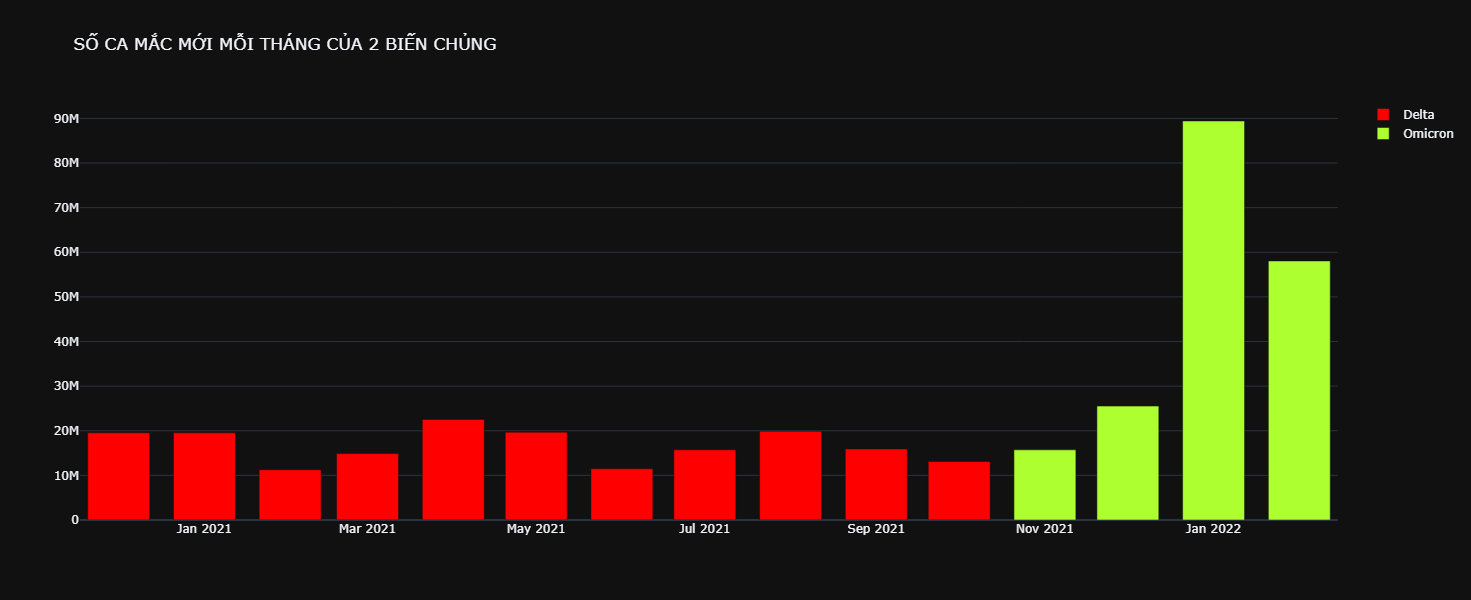

In [154]:
plot_ticks_variant(covid_compare, "Month_Years", "NewCases", 'SỐ CA MẮC MỚI MỖI THÁNG CỦA 2 BIẾN CHỦNG', is_group=True)

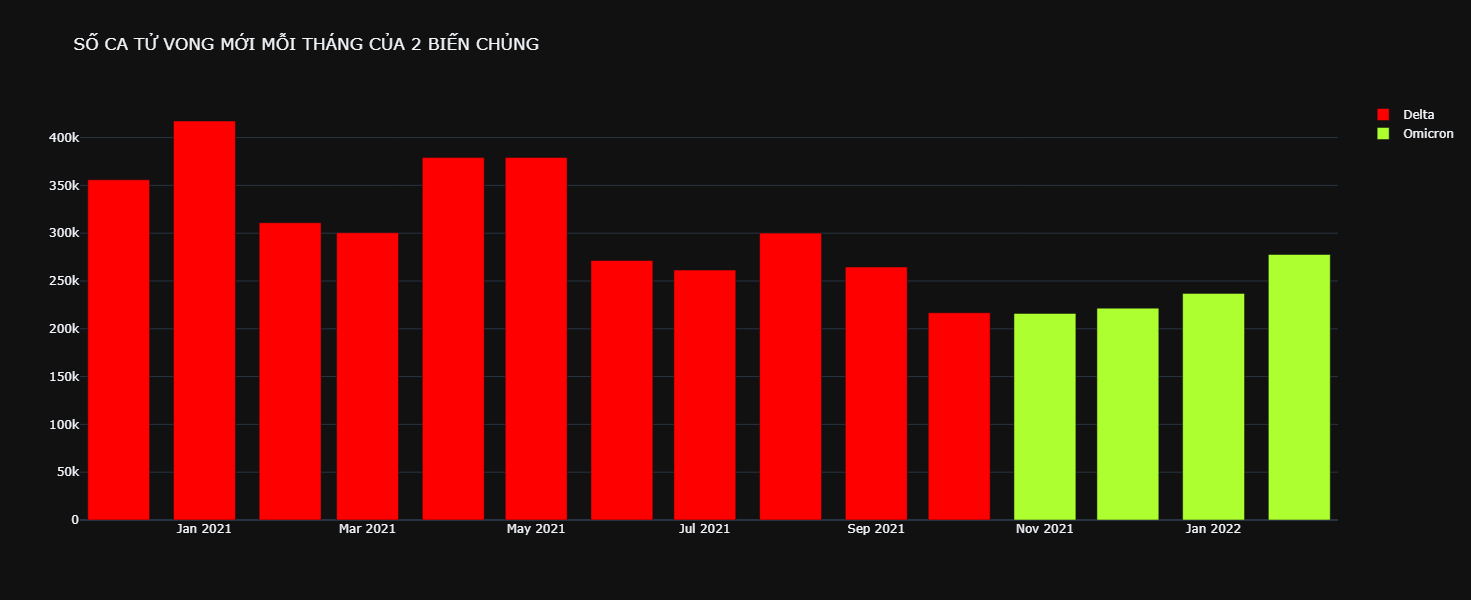

In [155]:
plot_ticks_variant(covid_compare, "Month_Years", "NewDeaths", 'SỐ CA TỬ VONG MỚI MỖI THÁNG CỦA 2 BIẾN CHỦNG', is_group=True)

**Theo biểu đồ**
- **Do bảng số liệu chỉ lấy những ngày đầu tháng 3/2022 nên nhóm xin phép bỏ qua tháng 3, chỉ lấy số liệu đến tháng 2/2022 để rút ra kết luận**

- **Chỉ mới xuất hiện tháng 11/2021 nhưng số ca mắc mới hàng tháng của biến chủng `OMICRON` lại tăng một cách không kiếm soát được. Số ca mắc của biến chủng này nhìn chung cao hơn rất nhiều so với biến chủng `DELTA` trước đó.**

- **Tuy nhiên, số ca tử vong mới hàng tháng của biến chủng `OMICRON` có phần ít hơn biến chủng `DELTA` , mặc dù biến chủng này xuất hiện sau và số ca mắc đang có xu hướng tăng lên theo mỗi tháng.**

**Ta sẽ xem xét mối quan hệ giữa 2 biến số `NewCases` và `NewDeaths` để có thể đưa ra nhận xét xem số ca tử vong mới có tăng lên khi số ca mắc mới mỗi ngày lần lượt tăng của cả hai biến thể bằng biểu đồ `Scatter`**

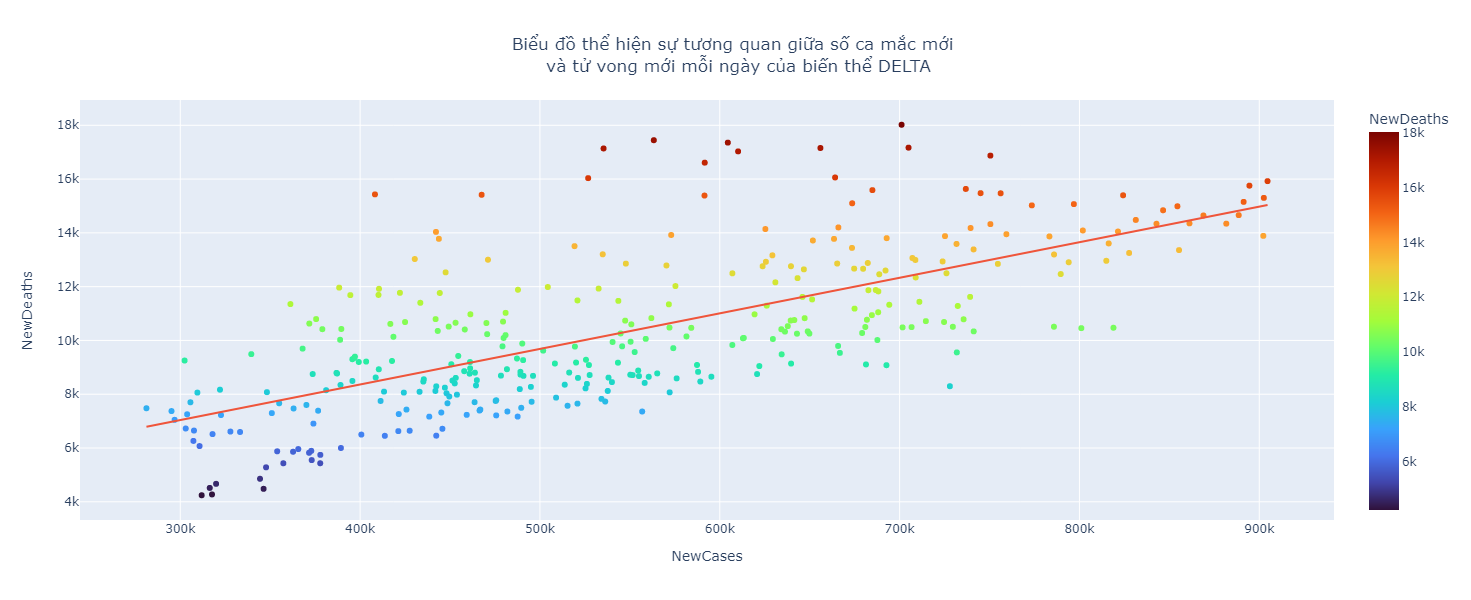

In [156]:
plot_scatter(covid_delta, "NewCases", "NewDeaths", "Biểu đồ thể hiện sự tương quan giữa số ca mắc mới <br> và tử vong mới mỗi ngày của biến thể DELTA", "Date")

Ta tính hệ số tương quan của đường tuyến tính

In [157]:
res = stats.linregress(covid_delta["NewCases"], covid_delta["NewDeaths"])
print(f"Hệ số tương quan giữa 2 biến là R = {res.rvalue} cho thấy đường tuyến tính tương quan thuận, có độ mạnh trung bình. \
Với biến chủng DELTA, số ca mắc mới tăng thì số ca tử vong cũng tăng theo")

Hệ số tương quan giữa 2 biến là R = 0.6957555110837915 cho thấy đường tuyến tính tương quan thuận, có độ mạnh trung bình. Với biến chủng DELTA, số ca mắc mới tăng thì số ca tử vong cũng tăng theo


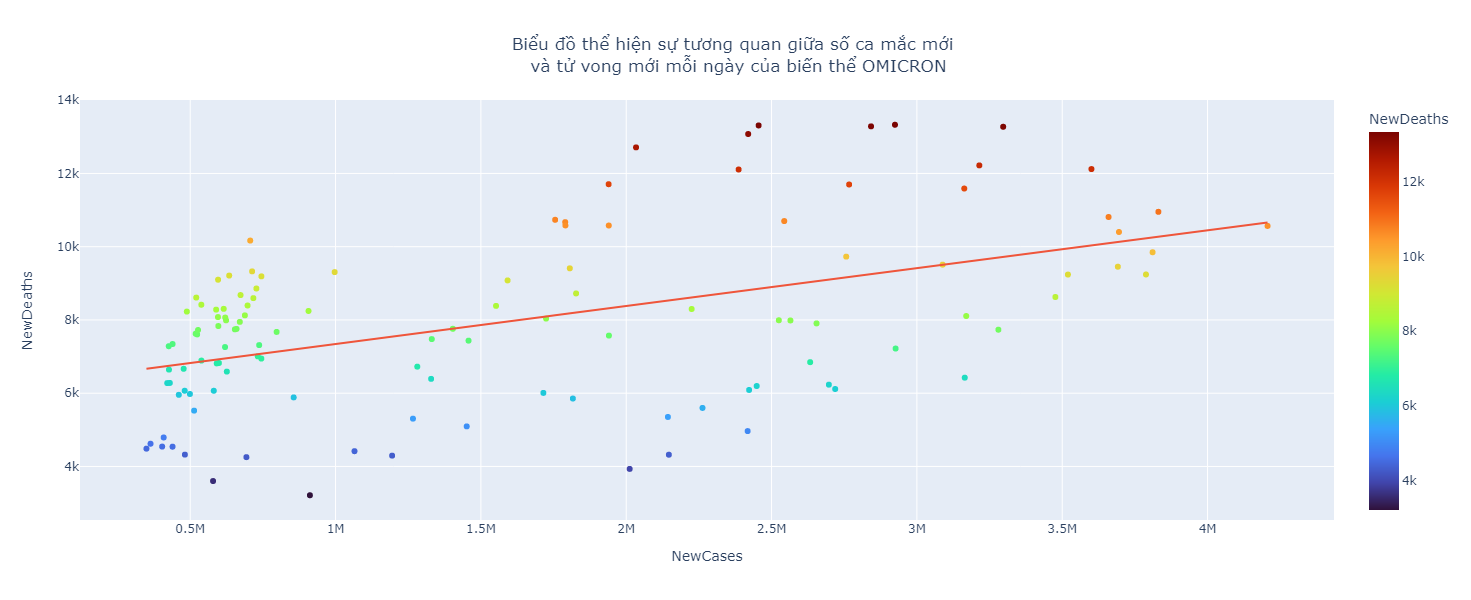

In [158]:
plot_scatter(covid_omicron, "NewCases", "NewDeaths", "Biểu đồ thể hiện sự tương quan giữa số ca mắc mới <br> và tử vong mới mỗi ngày của biến thể OMICRON", "Date")

Ta tính hệ số tương quan của đường tuyến tính

In [159]:
res = stats.linregress(covid_omicron["NewCases"], covid_omicron["NewDeaths"])
print(f"Hệ số tương quan giữa 2 biến là R = {res.rvalue} cho thấy đường tuyến tính tương quan thuận, có độ mạnh không quá mạnh hoặc yếu nhưng không bằng biến thể DELTA. \
Với biến chủng OMICRON, số ca mắc mới tăng thì số ca tử vong cũng tăng nhưng mà ít hơn nhiều so với DELTA => Có lẽ ít nguy hiểm hơn DELTA. \
Nhưng cũng không thể xem thường vì số ca mắc mới của biến thể này tăng rất nhanh, nhanh hơn nhiều so với DELTA")

Hệ số tương quan giữa 2 biến là R = 0.48769221282441555 cho thấy đường tuyến tính tương quan thuận, có độ mạnh không quá mạnh hoặc yếu nhưng không bằng biến thể DELTA. Với biến chủng OMICRON, số ca mắc mới tăng thì số ca tử vong cũng tăng nhưng mà ít hơn nhiều so với DELTA => Có lẽ ít nguy hiểm hơn DELTA. Nhưng cũng không thể xem thường vì số ca mắc mới của biến thể này tăng rất nhanh, nhanh hơn nhiều so với DELTA


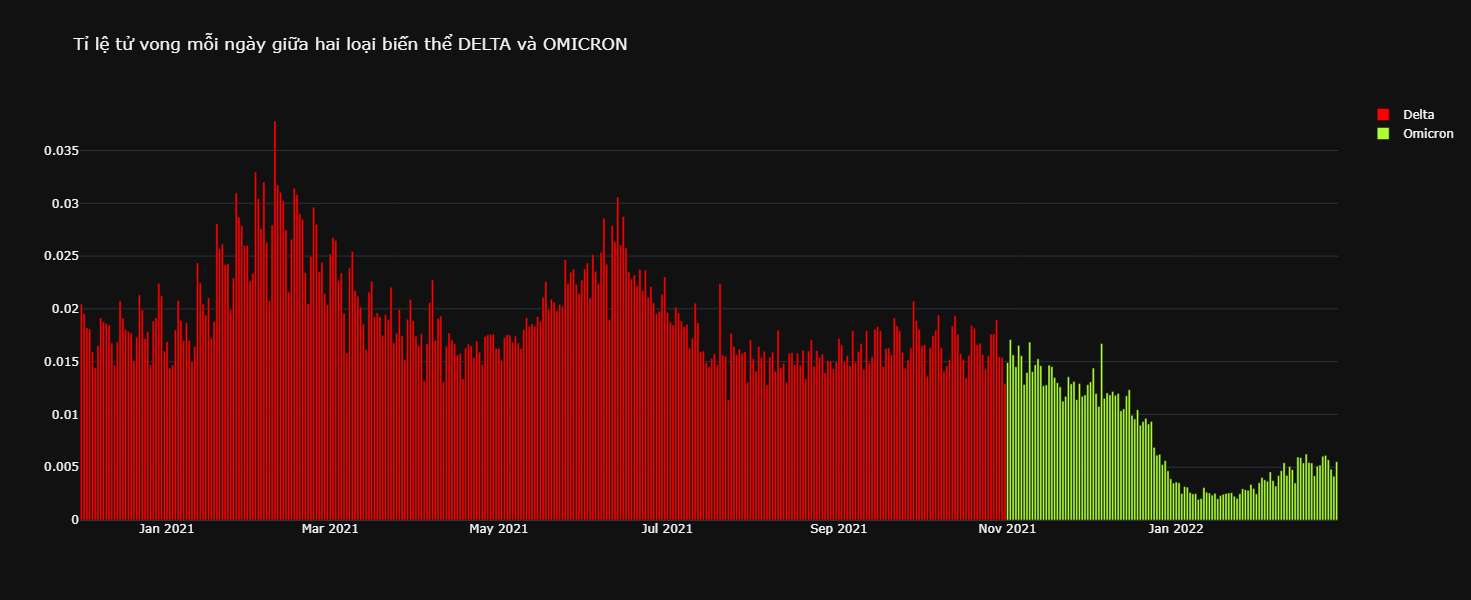

Từ biểu đồ ta cũng có thể thấy được rằng tỉ lệ tử vong vì biến thể DELTA lớn hơn OMICRON.


In [160]:
plot_ticks_variant(covid_compare, "Date", "Mortality", "Tỉ lệ tử vong mỗi ngày giữa hai loại biến thể DELTA và OMICRON", is_group=False)
print("Từ biểu đồ ta cũng có thể thấy được rằng tỉ lệ tử vong vì biến thể DELTA lớn hơn OMICRON.")

Dựa vào biểu đồ tỷ lệ tử vong của 2 loại biến thể và hệ số tương quan, nhóm em đưa ra nhận xét:

- Biến thể `DELTA` có mối tương quan mạnh hơn so với biến thể `OMICRON`. (giữa 2 biến `NewCases` và `NewDeaths` theo từng ngày)
- Biến thể `DELTA` có tốc độ lây lan nhanh, số ca tử vong mới mỗi ngày tăng cao dẫn đến tỷ lệ tử vong cao.
- Biến thể `OMICRON` có tốc độ lây lan nhanh vượt trội so với biến thể `DELTA` (mặc dù biến thể `OMICRON` xuất hiện sau) nhưng về số ca tử vong mới mỗi ngày thì biến thể `OMICRON` ít hơn dẫn tới tỷ lệ tử vong cũng thấp hơn biến thể `DELTA`

Để có thể đưa ra kết luận chắc chắn, ta thực hiện kiểm định thống kê T-test `C (Nhóm biến thể) --> Q (Tỷ lệ tử vong)`(2 nhóm độc lập): tỉ lệ tử vong vì dịch bệnh mỗi ngày của hai nhóm biến thể `DELTA` và `OMICRON`

Ta đặt giả thuyết:

`H0: tỉ lệ tử vong của hai nhóm biến thể là như nhau`

`Ha: tỉ lệ tử vong của biến thể DELTA cao hơn OMICRON.`

In [161]:
t, p = stats.ttest_ind(covid_delta['Mortality'], covid_omicron['Mortality'])
print ('Giá trị p tính được là kiểm định hai phía: p = ', p)
print ('Vì ta kiểm định 1 phía nên p_value = p/2 = ', p/2)
p = p/2
print (f'Ta có p_value = {p} < 0,05 và t = {t} > 0 => Ta bác bỏ giả thuyết H0, chấp nhận Ha')

Giá trị p tính được là kiểm định hai phía: p =  3.763915980121889e-83
Vì ta kiểm định 1 phía nên p_value = p/2 =  1.8819579900609447e-83
Ta có p_value = 1.8819579900609447e-83 < 0,05 và t = 24.09083434337719 > 0 => Ta bác bỏ giả thuyết H0, chấp nhận Ha


Tính khoảng tin cậy 95% cho trung bình

In [162]:
CI_variant = get_confident_interval(covid_delta['Mortality'], covid_omicron['Mortality'])
print(f"Khoảng tin cậy 95% cho trung bình tỉ lệ tử vong của biến thể DELTA so với biến thể OMICRON: {CI_variant}. Hay nói cách khác, trung bình tỉ lệ tử vong của biến thể DELTA lớn hơn OMICRON trong khoảng đó")

Khoảng tin cậy 95% cho trung bình tỉ lệ tử vong của biến thể DELTA so với biến thể OMICRON: (0.011384694511358285, 0.01154846269717518). Hay nói cách khác, trung bình tỉ lệ tử vong của biến thể DELTA lớn hơn OMICRON trong khoảng đó


Nhận xét: 

Ta có thể đưa ra kết luận rằng tỉ lệ tử vong của nhóm biến thể `DELTA` cao hơn `OMICRON`. Do đó có thể nói tuy biến thể `OMICRON` làm gia tăng nhanh chóng số ca mắc nhưng tỉ lệ tử vọng lại thấp hơn so với biến thể `DELTA`. Vậy biến thể `OMICRON` có thể ít gây nguy hiểm hơn `DELTA` nhưng số ca mắc tăng nhanh có thể làm quá tải hệ thống y tế ở một số quốc gia. 

Chúng ta không nên xem thường bất kì loại biến thể nào của Covid-19